# Machine Learning Project: *Advertisement Impact Prediction*
**Team Name**: *The Miners*

**Members**: ALKHEJA Mahmoud, BACIU Alexis, RODUIT Fabien

**Date**: 28.05.2023

<br>

**Course**: Machine Learning

**Professor**: ENGELKE Sebastian

**Assistants**: PASCHE Olivier, HENTSCHEL Manuel , FLORU Anastasia

### Presentation of the scenario

*A company wants to assess the quality of their online advertisement campaign. Online users are the main interest in this campaign. The users see a web banner during their browsing activity. For each user, they want to be able to predict whether they subscribe to the advertised product through the advertisement banner, based on the information they have about them. To subscribe, the user has to click on the banner and then subscribe to the service. The target variable name* [from the dataset provided] *is subscription.*

## 1. Introduction


### 1.1 Notebook structure

1. **Introduction**
    1. Notebook structure
    2. Imports
    3. Description of the data set

2. **Exploratory data analysis and feature engineering**
  1. First observations of the train data set
  2. Statistical metrics
  3. Data preprocessing
  4. Feature engineering

3. **Methods**
  1. Candidates models
  2. Logistic regression
  3. QDA
  4. Neural Net
  5. Decision Tree
  6. Random Forests
  7. Bagging
  8. Boosting
  9. SVM

4. **Best model diagnostics and final Kaggle prediction**
5. **Conclusion**

### 1.2 Imports

In [ ]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, ParameterGrid, GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier


In [ ]:
# URL links for permanent online access with Google Colab

# Accessing the Train data
url_train = "https://raw.githubusercontent.com/alexis300/ML-2023/main/MLUnige2023_subscriptions_train.csv"
subs = pd.read_csv(url_train)

# Accessing the Test data
url_test = "https://raw.githubusercontent.com/alexis300/ML-2023/main/MLUnige2023_subscriptions_test.csv"
test = pd.read_csv(url_test)

### 1.3 Description of the data set

In [ ]:
# Basic description of the train dataset
subs.info()

# Basic description of the train dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8952 entries, 0 to 8951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                8952 non-null   int64  
 1   age               8952 non-null   int64  
 2   job               8952 non-null   object 
 3   marital           8952 non-null   object 
 4   education         8952 non-null   object 
 5   device            8952 non-null   object 
 6   day               8952 non-null   int64  
 7   month             8952 non-null   int64  
 8   time_spent        8952 non-null   float64
 9   banner_views      8952 non-null   int64  
 10  banner_views_old  8952 non-null   int64  
 11  days_elapsed_old  8952 non-null   int64  
 12  outcome_old       8952 non-null   object 
 13  X1                8952 non-null   int64  
 14  X2                8952 non-null   int64  
 15  X3                8952 non-null   int64  
 16  X4                8952 non-null   float64


The train dataset used for the project contains 8952 observations and 18 different variables.
We have information on the user"s id, and from a demographic point of view, they provide information on the current and the old campaign for the same product, toward the end there are some variables without information, and finally, there is the response variable.

Here is an explicit description of the variables:

1. **Id**: a unique identifier of the observations in each dataset. In the test set, it is used to match your predictions with the true values.
2. **age**: years old (numeric)
3. **job**: type of job (categorical: teacher, industrial_worker, entrepreneur, housekeeper, manager, retired, freelance, salesman, student, technology, unemployed, na)
4. **marital**: marital status (categorical: married, divorced, single)
5. **education**: (categorical: high_school, university, grad_school, na)
6. **device**: from which device does the user see the banner? (categorical: smartphone, desktop, na)
7. **day**: last day of the month when the user saw the banner (numeric)
8. **month**: last month of the year when the user saw the banner (numeric)
9. **time_spent**: how long the user looked at the banner last time (in seconds) (numeric)
10. **banner_views**: number of times the user saw the banner (numeric)
11. **banner_views_old**: number of times the user saw the banner during an old (and related) online ads campaign (numeric)
12. **days_elapsed_old**: number of days since the user saw the banner of an old (and related) online ads campaign (numeric, -1 if the user never saw the banner)
13. **outcome_old**: outcome of the old (and related) online ads campaign (categorical: failure, other, success, na)
14. **X1**: No additional information (categorical: 1, 0)
15. **X2**: No additional information(categorical: 1, 0)
16. **X3**: No additional information(categorical: 1, 0)
17. **X4**: No additional information(numeric)
18. **subscription**: The response variable. whether the user subscribed through the banner.  (1:yes, 0:no)

The test dataset contains 3836 observations and 17 variables (only predictors).

Additionally, we can precise that some variables such as "X1" or "X2" are difficult to interprete. No information is provided on their meaning and it is difficult to deduce one. The outcome variable "subscription" that we will try to predict is a binary variable taking 1 when there was a positive subscription and 0 when there was no subscription. We note the presence of missing values for different variables. The missing values are encoded as a string since the `.info()` method does not reveal any NA.

## 2. Exploratory data analysis and feature engineering


### 2.1 First observations of the train data set

In [ ]:
# First observations
subs.head(n=10)

,Id,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
0,0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,na,0,1,1,0.068110,0
3,3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
5,5,48,industrial_worker,married,high_school,na,19,6,6.30,2,0,-1,na,0,0,0,0.078696,0
6,6,31,teacher,single,university,na,7,5,24.10,2,0,-1,na,0,0,1,0.075518,0
7,7,55,industrial_worker,married,high_school,na,17,6,7.00,2,0,-1,na,0,0,0,0.072903,0
8,8,44,teacher,married,university,smartphone,3,11,13.95,1,0,-1,na,0,0,0,0.074665,1
9,9,26,salesman,single,university,smartphone,7,5,28.60,2,4,283,failure,0,0,1,0.123037,0


A view to the first 10 observations suggest that variables may need to be cleaned before use. For example, we will need to treat missing values.

### 2.2 Statistical metrics

In [ ]:
# Statistical summary
subs_no_Id = subs.drop("Id", axis=1)
subs_no_Id.describe()

,age,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,X1,X2,X3,X4,subscription
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,41.201743,15.663762,6.207328,17.130306,2.540550,0.759160,49.403262,0.141086,0.013963,0.496984,0.086603,0.416443
std,11.638321,8.379622,2.509444,16.902741,2.824065,2.099277,107.365840,0.348129,0.117345,0.500019,0.030253,0.492996
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,8.000000,5.000000,6.100000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.073891,0.000000
50%,39.000000,16.000000,6.000000,11.450000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.077661,0.000000
75%,49.000000,21.000000,8.000000,22.500000,3.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.087768,1.000000
max,95.000000,31.000000,12.000000,245.400000,63.000000,58.000000,854.000000,1.000000,1.000000,1.000000,0.810043,1.000000


The statistical summary present a first view of the dataset distribution. The average age of the user viewing the web banner is 41 years old and the median age is 39 years old. Similarly, we can inspect the remaining variables. The views for the banner during an old campagin is below 1 on average, indicating that most users did not see the banner during the old campaign. We can already tell that some variables are not normally distributed by looking at the quantiles.

##### Frequencies

In [ ]:
# Frequencies
def print_value_counts(df, columns):
    for col in columns:
        print(f"Frequency counts for {col}:\n")
        print(df[col].value_counts())
        print("\n" + "-"*50 + "\n")

# list of columns for which we want to display frequency counts
cols_to_check = ["days_elapsed_old", "banner_views_old", "outcome_old", "device", "job", "education"]

print_value_counts(subs, cols_to_check)

Frequency counts for days_elapsed_old:

-1      6803
 92       76
 182      63
 181      57
 183      53
        ... 
 562       1
 792       1
 7         1
 490       1
 211       1
Name: days_elapsed_old, Length: 437, dtype: int64

--------------------------------------------------

Frequency counts for banner_views_old:

0     6803
1      689
2      522
3      321
4      186
5      140
6       84
7       61
8       39
9       29
10      22
11      14
13       8
12       6
14       5
15       4
17       3
23       3
22       2
19       2
24       1
29       1
37       1
40       1
21       1
25       1
20       1
58       1
16       1
Name: banner_views_old, dtype: int64

--------------------------------------------------

Frequency counts for outcome_old:

na         6804
failure     977
success     768
other       403
Name: outcome_old, dtype: int64

--------------------------------------------------

Frequency counts for device:

smartphone    6305
na            2050
desktop      

##### Correlation matrix

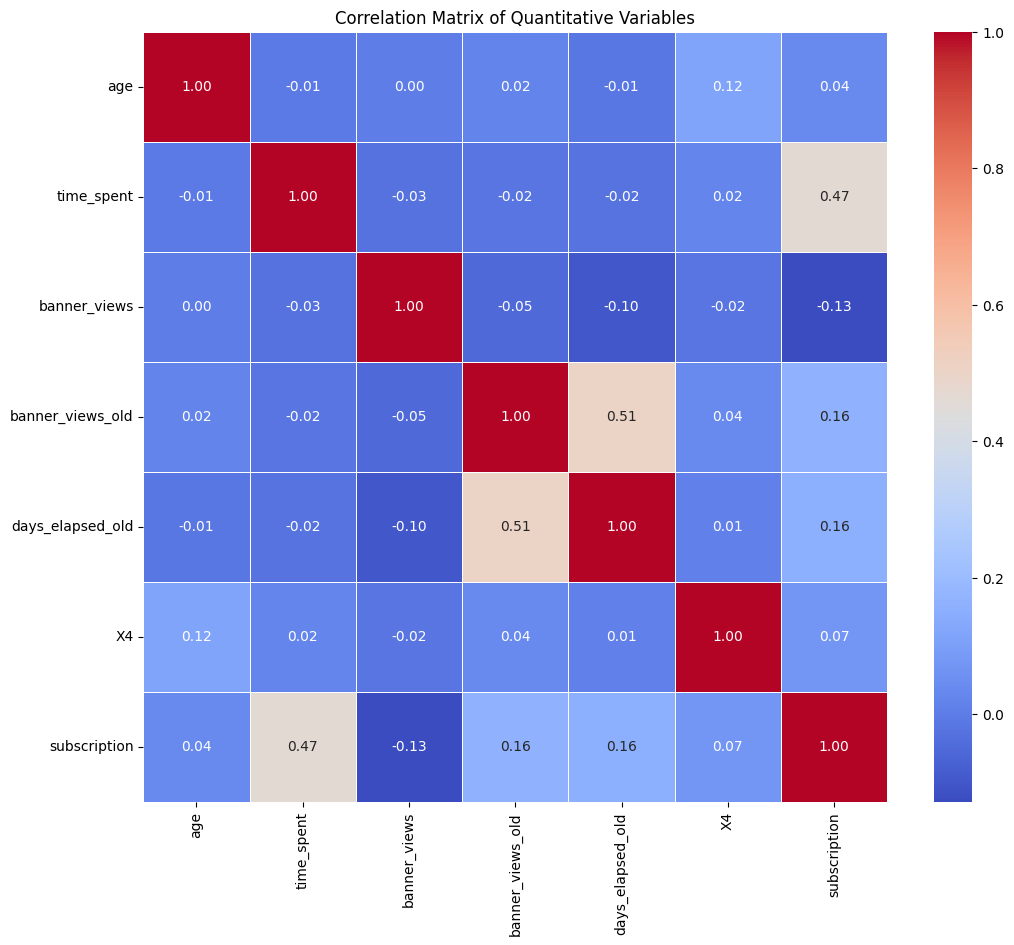

In [ ]:
# Correlation matrix computing
subscription_quant = subs.drop(["Id","day","month","job","marital","education","device","outcome_old","X1","X2","X3"], axis = "columns")
corr_matrix = subscription_quant.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Title
plt.title("Correlation Matrix of Quantitative Variables")

# Plot
plt.show()

The correlation matrix suggests very low correlation between metrics, except for variable time_spent which presents a positive value that highs at 0.47.

#### Visualizations

##### Scatter plot

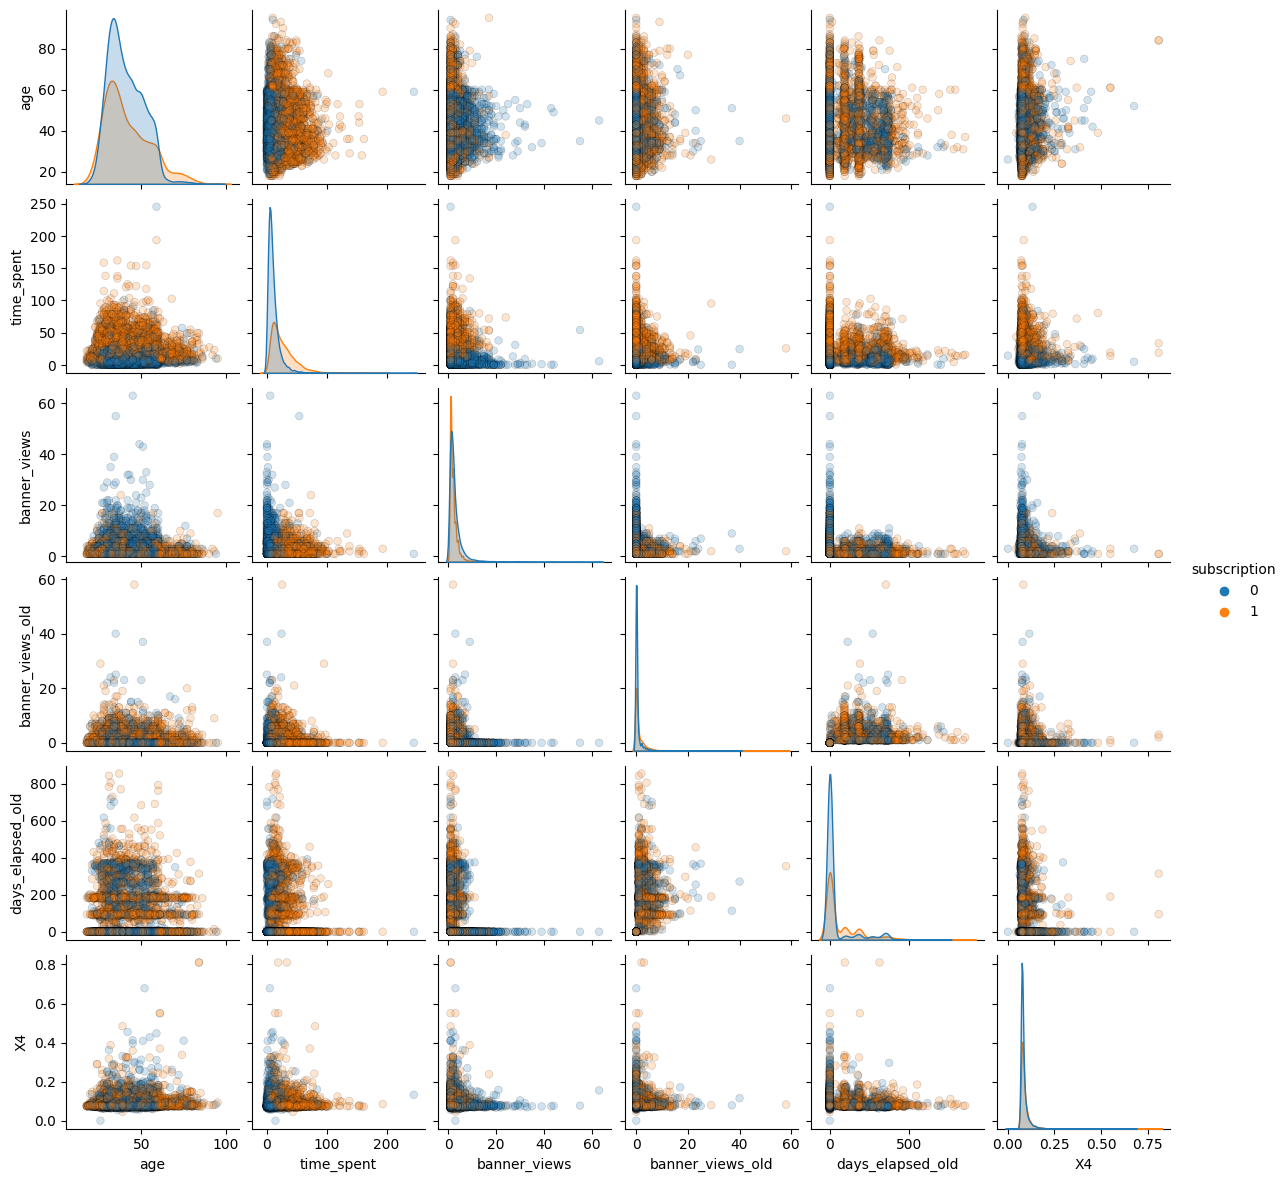

In [ ]:
# Scatter plot

# Variable selection (numerical)
subscription_quant = subs.drop(["Id","day","month","job","marital","education","device","outcome_old","X1","X2","X3"], axis = "columns")

# Pairplot
sns.pairplot(subscription_quant,hue="subscription", diag_kind="kde", markers="o", plot_kws={"alpha": 0.2, "s": 30, "edgecolor": "k"}, height=2)
plt.show()

We use a pair plot to continue exploring the relationship between the variables. Also we try to find possible patterns with respect to the response "subscription". This method allows to see distributions and to find possible promising features predicting "subscription".

In our case, we observe that this method gives additional insights since patterns appear. The blue and orange values which are representing the outcome 0 (no) and 1(yes) respectively, can be grouped differently. For instance when looking at the "time_spent" we note that higher is the value in time spent, the more likely it is to find a positive subscription.

We understand that variables provide more or less meaningfull information with respect to the response variable.

##### Boxplots for numerical values

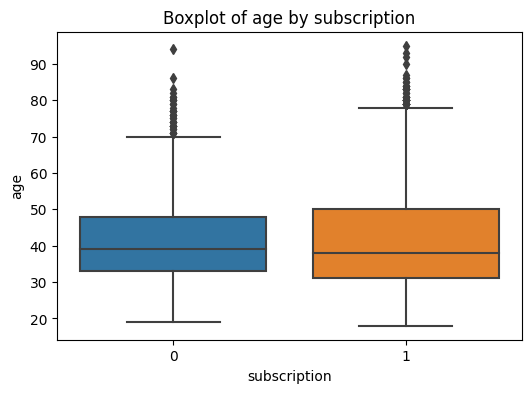

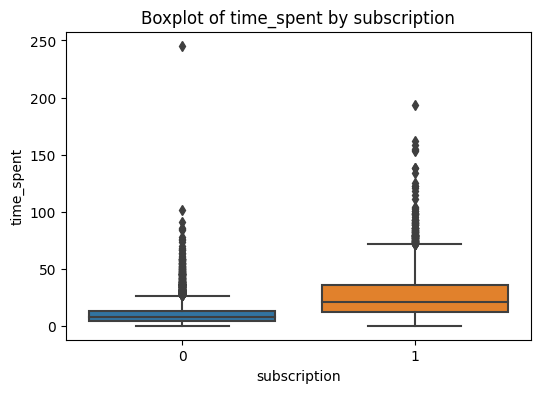

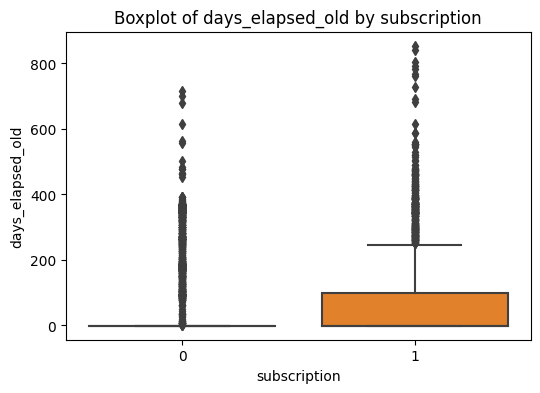

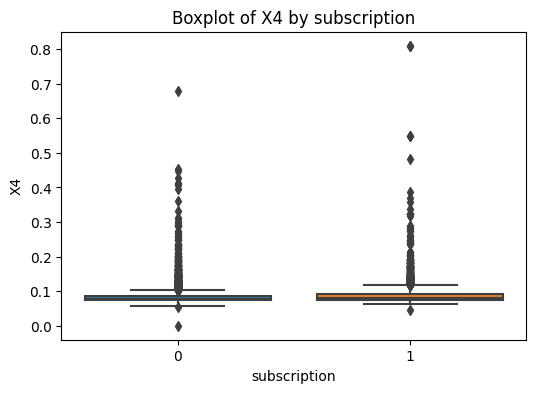

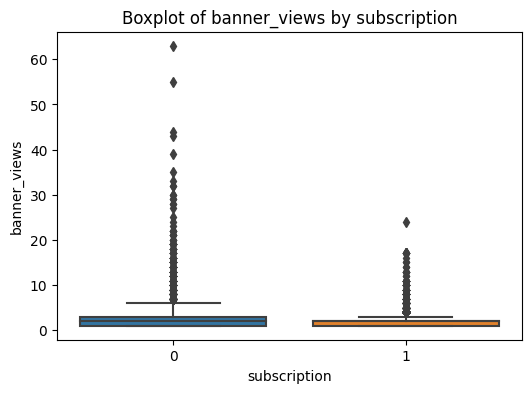

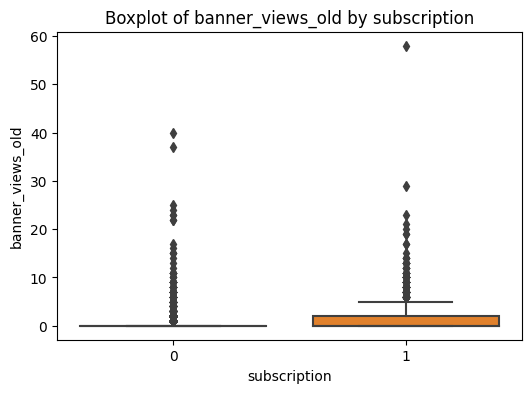

In [ ]:
# Using numerical features
variable_quant = ["age","time_spent","days_elapsed_old","X4","banner_views","banner_views_old"]

# Each boxplot
for variable in variable_quant:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="subscription", y=variable, data=subs)
    plt.title(f"Boxplot of {variable} by subscription")
    plt.show()

A boxplot visualisation helps to confirm our instinct. We see clear differences in distribution between categories. *Time_spent*, *days_elapsed_old* and *banner_views_old* are good examples. We understand that significant differences are likely to exist between the groups and therefore our dataset include predictors that could be usefull for our predictions.

##### Barplots for categories

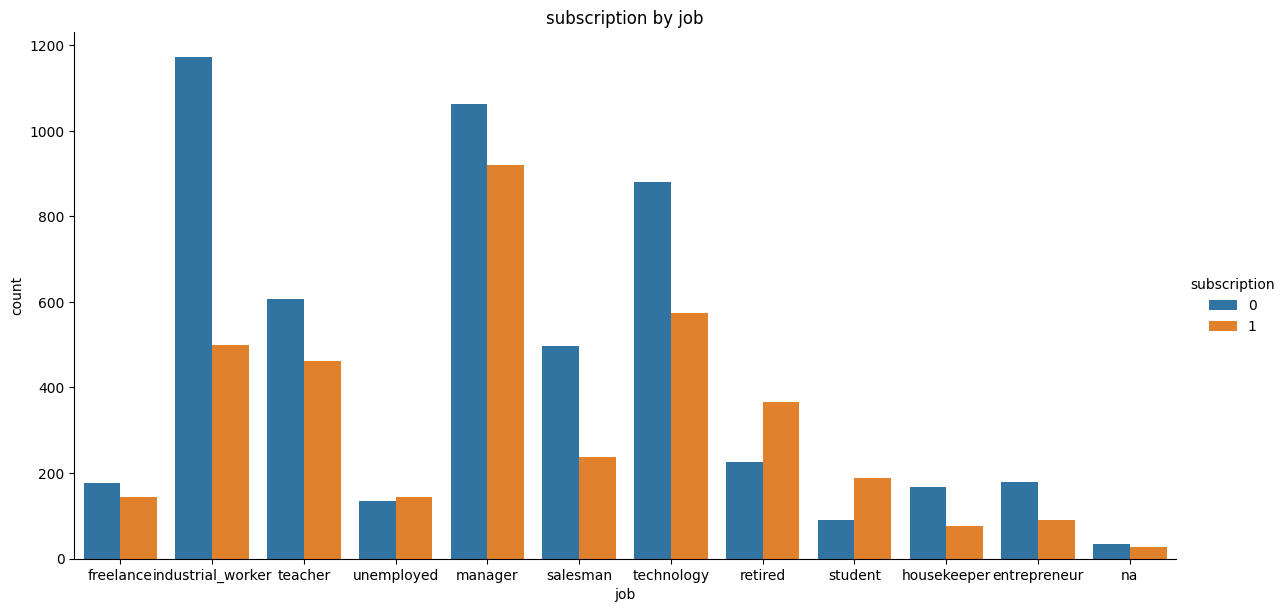

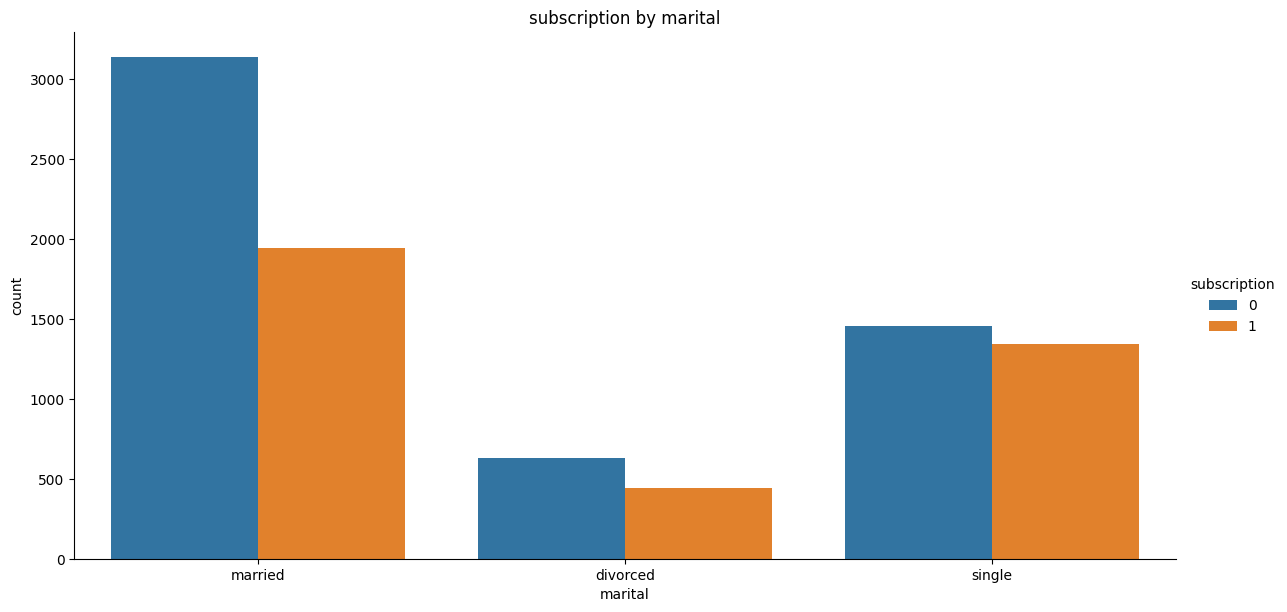

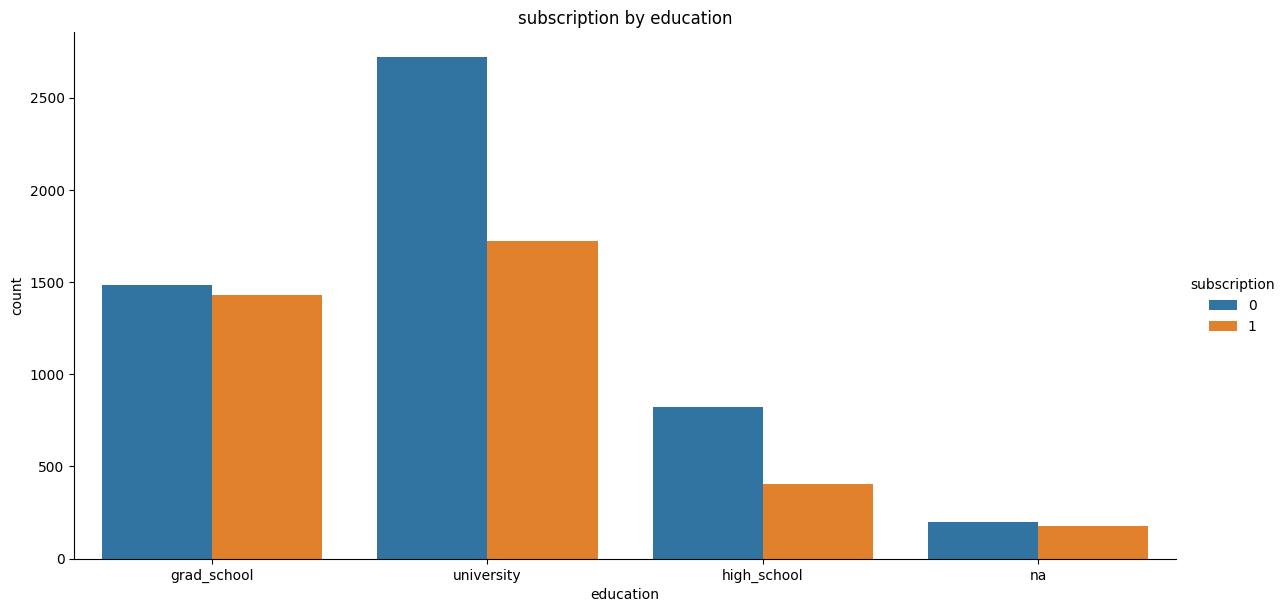

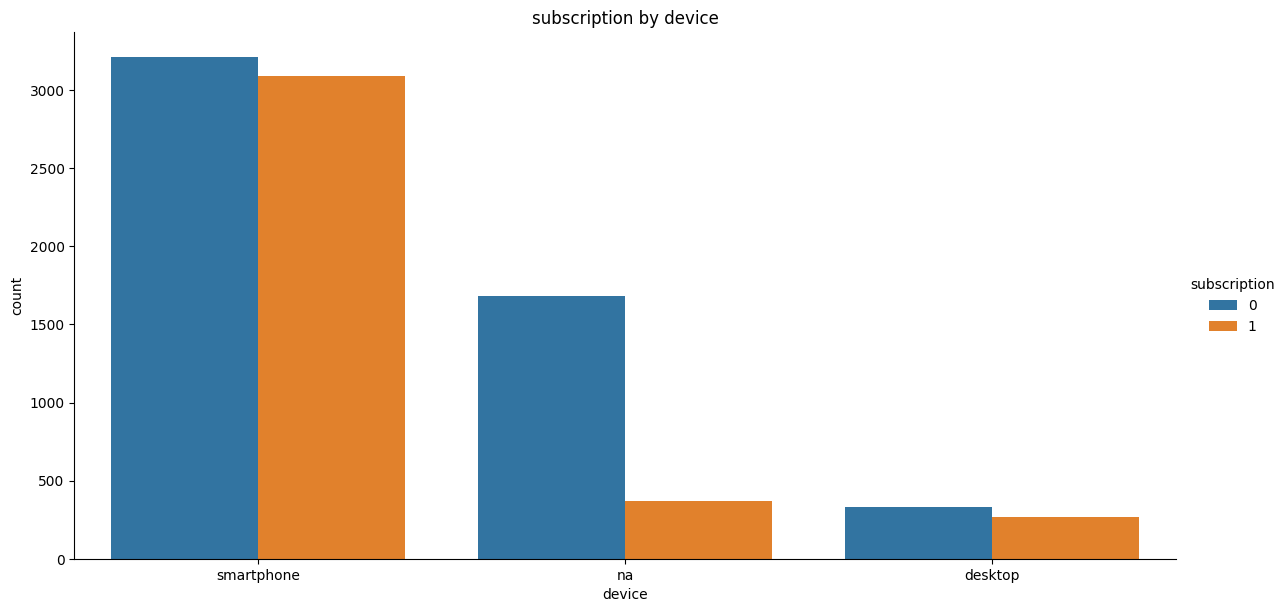

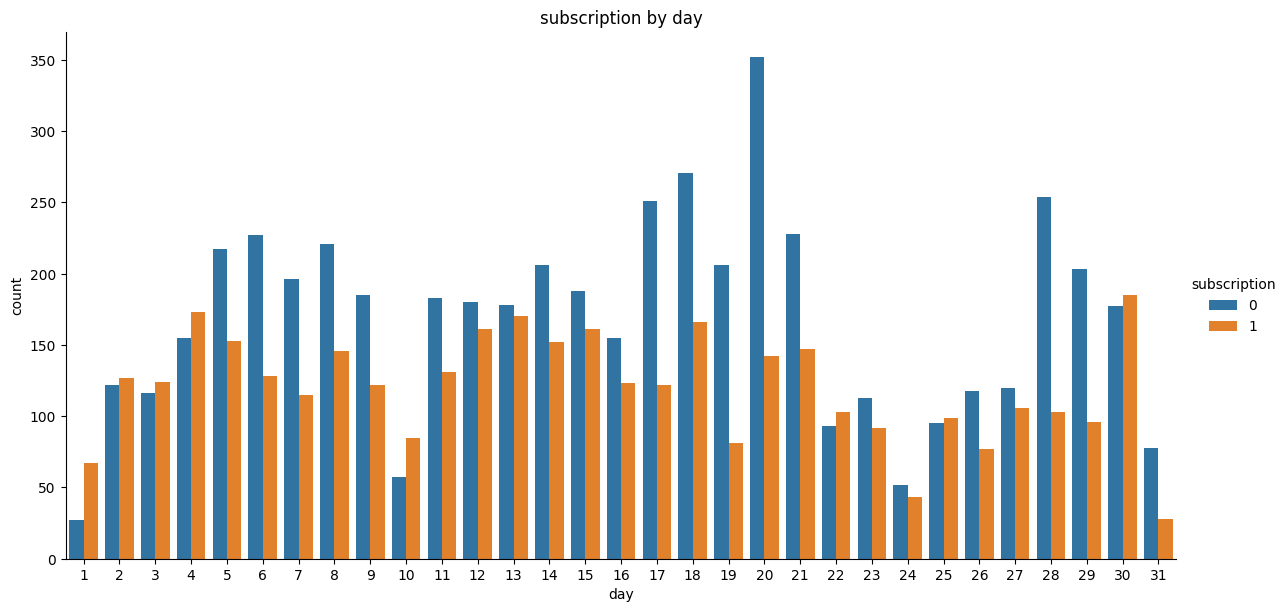

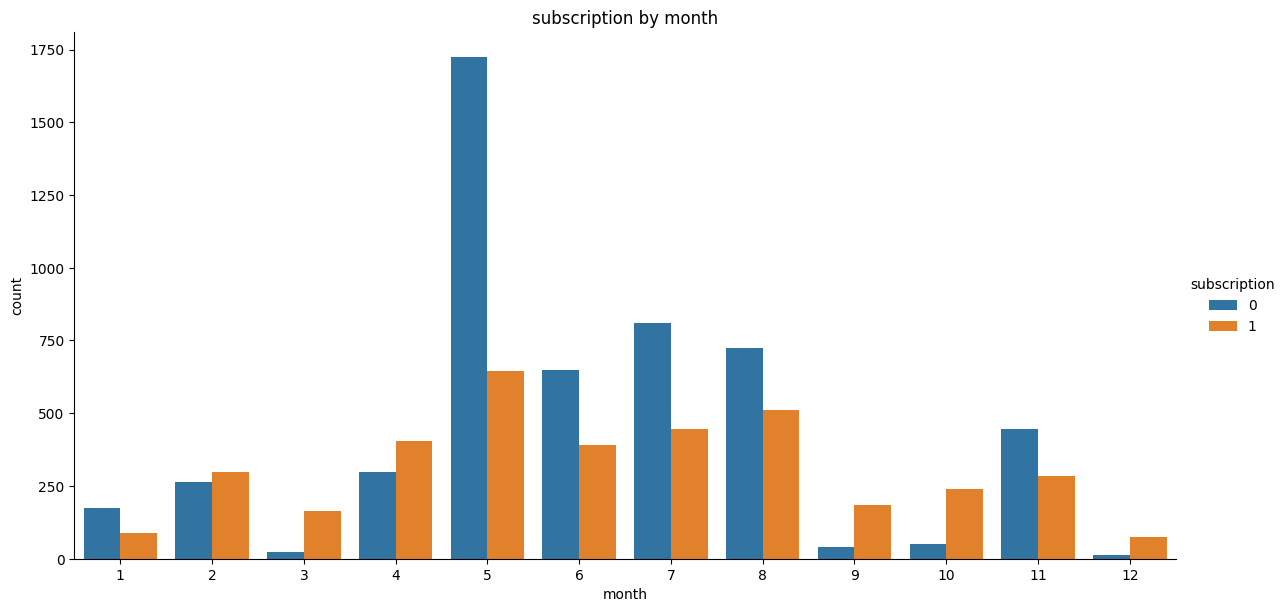

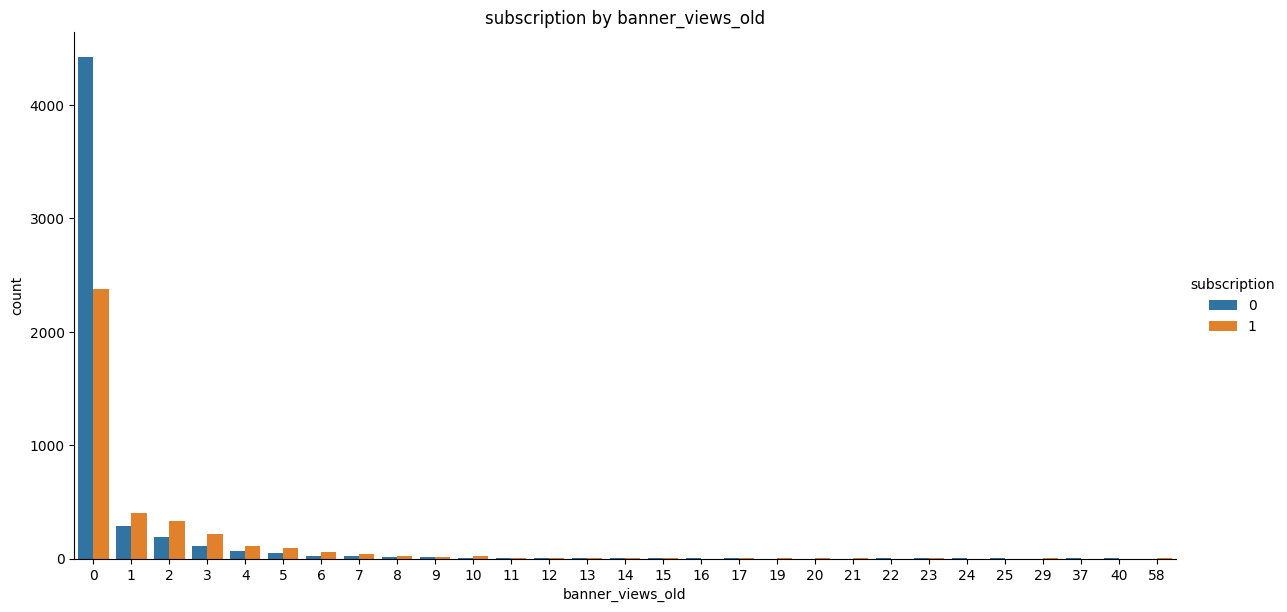

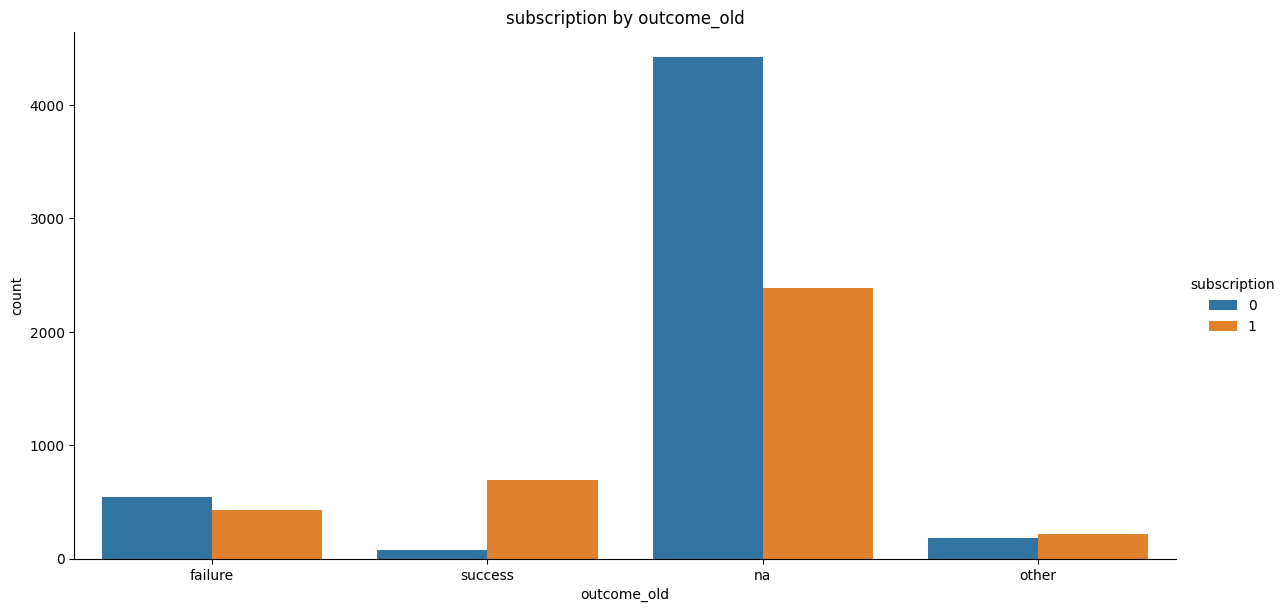

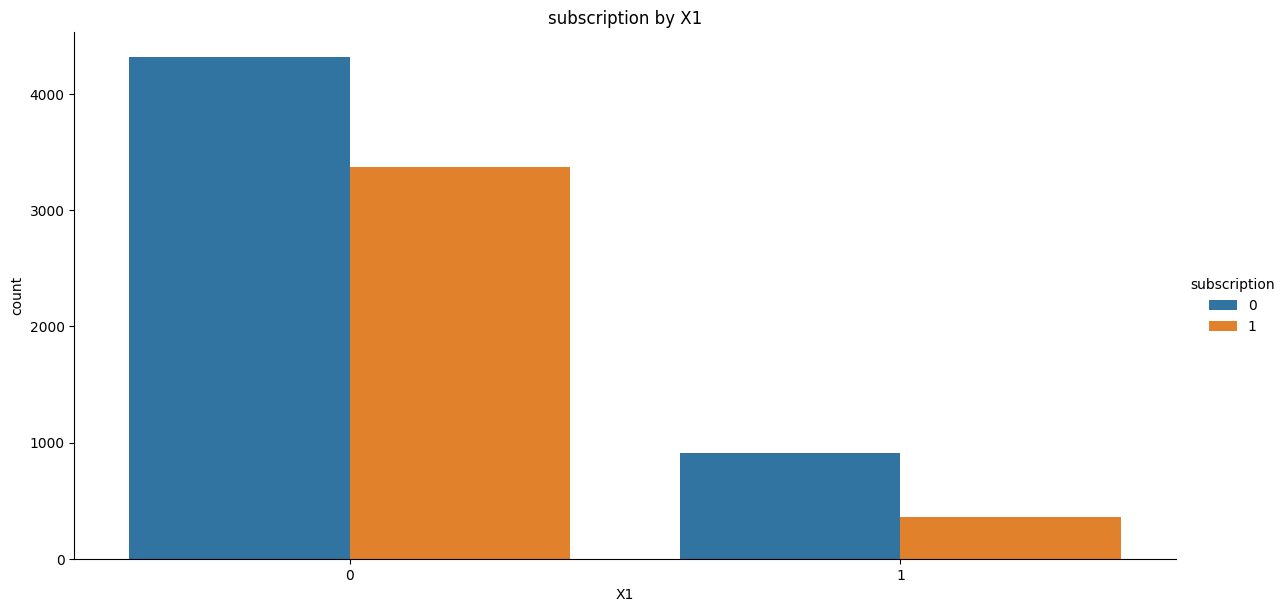

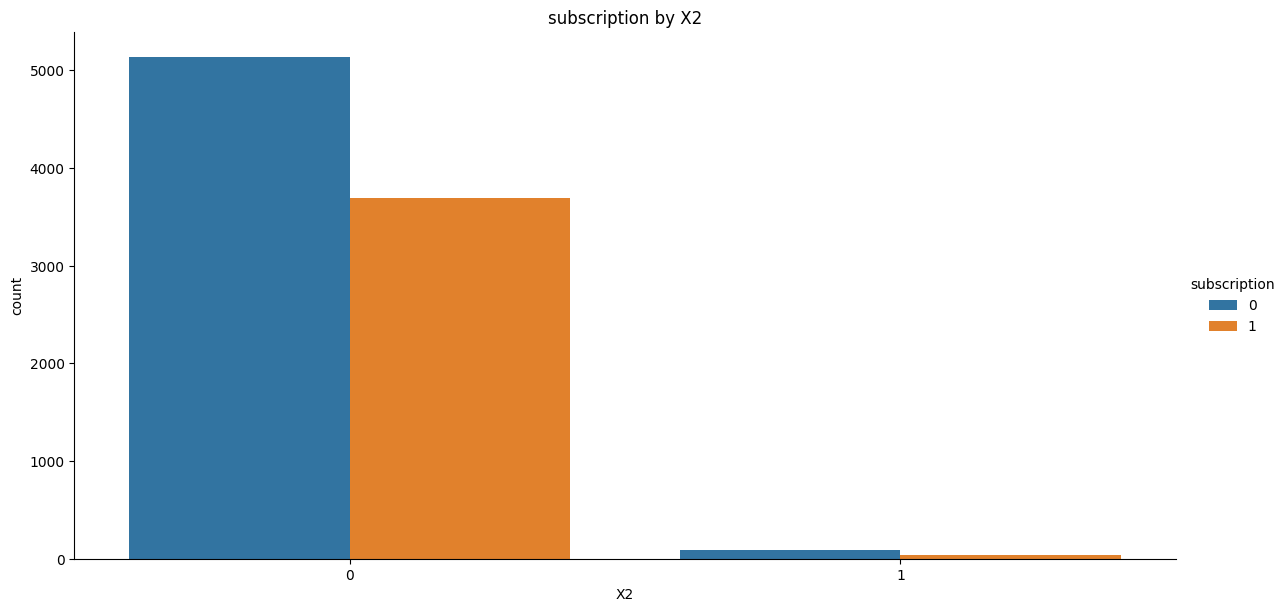

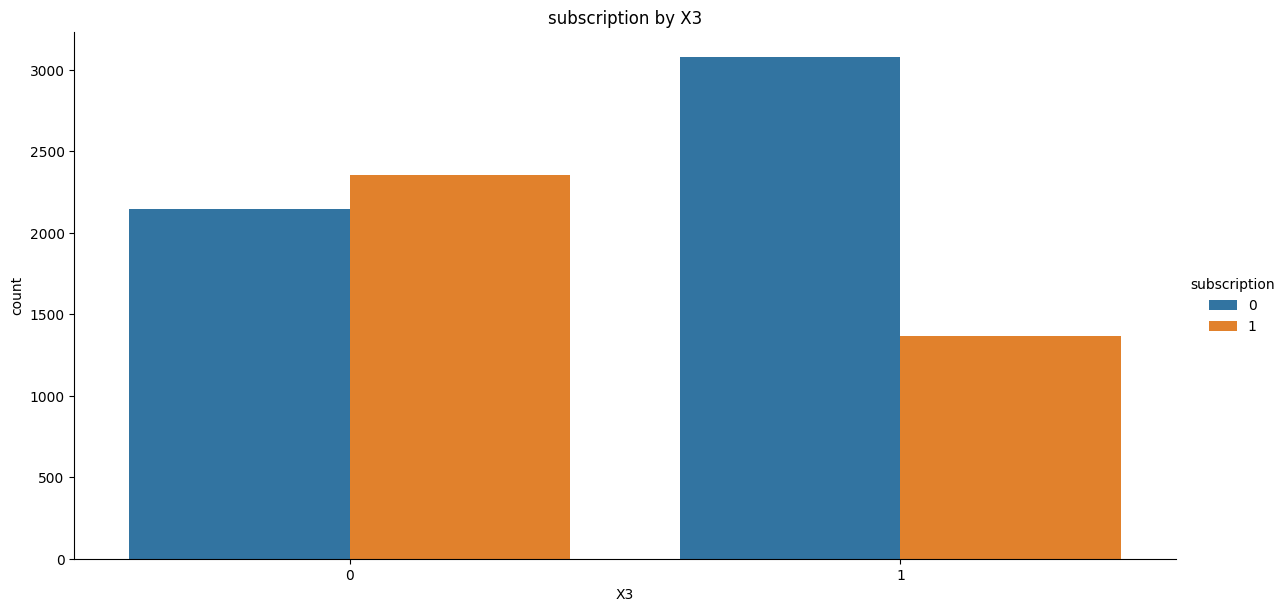

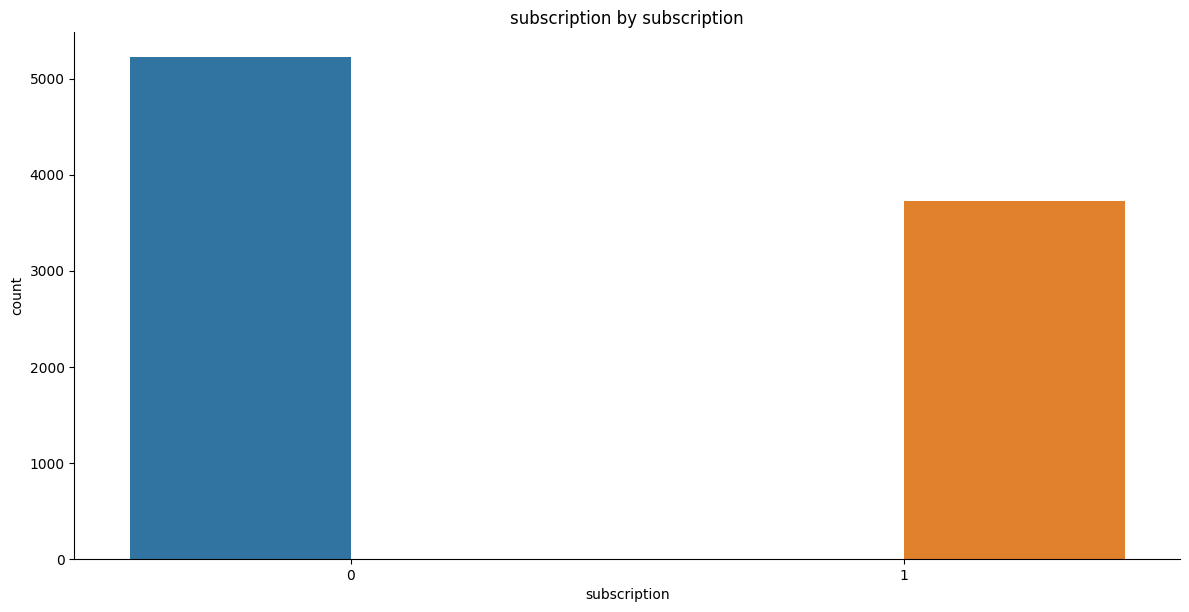

In [ ]:
# Using categorical features
categorical_variables = ["job","marital","education","device","day","month","banner_views_old","outcome_old","X1","X2","X3","subscription"]

# Barplots
for variable in categorical_variables:
    sns.catplot(x=variable, hue="subscription", data=subs, kind="count", height=6, aspect=2)
    plt.title(f"subscription by {variable}")
    plt.show()

In [ ]:
def print_value_counts(df, columns):
    for col in columns:
        print(f"Frequency counts for {col}:\n")
        print(df[col].value_counts())
        print("\n" + "-"*50 + "\n")

# list of columns for which we want to display frequency counts
cols_to_check = ["days_elapsed_old", "banner_views_old", "outcome_old", "device", "job", "education"]

print_value_counts(subs, cols_to_check)


Frequency counts for days_elapsed_old:

-1      6803
 92       76
 182      63
 181      57
 183      53
        ... 
 562       1
 792       1
 7         1
 490       1
 211       1
Name: days_elapsed_old, Length: 437, dtype: int64

--------------------------------------------------

Frequency counts for banner_views_old:

0     6803
1      689
2      522
3      321
4      186
5      140
6       84
7       61
8       39
9       29
10      22
11      14
13       8
12       6
14       5
15       4
17       3
23       3
22       2
19       2
24       1
29       1
37       1
40       1
21       1
25       1
20       1
58       1
16       1
Name: banner_views_old, dtype: int64

--------------------------------------------------

Frequency counts for outcome_old:

na         6804
failure     977
success     768
other       403
Name: outcome_old, dtype: int64

--------------------------------------------------

Frequency counts for device:

smartphone    6305
na            2050
desktop      

In [ ]:
len(subs.loc[subs["subscription"]==1])/len(subs)

0.4164432529043789

The barplots provide additional insights with respect to subscription and confirms again that differences between categories are present.

We note that the dataset is slightly imbalanced as there are almost 1000 more observations without subscription than with...

#### General comments on the situation using statistical metrics and visualizations

As noted before, there is an slightly imbalance as there is around 41.64% of subscription = 1, so we have to keep this in mind when comparing the number of subscription = 1 and subscription= 0 for each category and value. The barplots also show imbalances in the values the categorical variables take.

For job, we can see that the imbalance is more pronounced when the type of job is Industrial_worker, salesman, technology, entrepreneur, or housekeeper. The imbalance is less pronounced for teacher, freelance, manager and na values. The imbalance is reversed when the type of job is unemployed, retired, and student. Also, the imbalance is stronger for retired and student than for unemployed. We can also note that there are way more industrial_worker, manager, and technology as job types. There are way less freelance, unemployed, student, housekeeper, entrepreneur, and na values as job types.

For marital, the imbalance seems stronger for married than for the other two statuses. The count of married visitors precedes the count of single visitors and divorced visitors.

For education, the imbalance is more pronounced for university and high_school. The count of university visitors precedes the count of grad_school visitors and high_school visitors.

For X1, X2 and X3 the imbalance is more apparent when they are equal to 1. There are many more X1=0 than X1=1. This is especially true for X2 where there are only a few X2=1.

Based on the correlation plot and the summary, we observe a relationship between the variables related to a previous campaign.  We find that there are 6803 observations where users did not view the banner (0 views), which are the same as the number with the count of -1 in the "days_elapsed_old" variable. Additionally, the count of "na" values in the "outcome_old" variable matches these numbers as well.  Given these findings, we can conclude that the "na" values in the "outcome_old" variable have significance in this context. It could indicate that the user did not participate in the old campaign. Therefore, it is reasonable to keep these "na" values in the "outcome_old" variable for further analysis as a new class. Indeed, it would not make sense to impute an outcome to something that did not happen. From the barplots, it would seem that having seen the old campaign has a favorable impact on subscriptions as there is an obvious imbalance in the na values. Also, failure for the old campaign seems to have less of an impact on subscription than success.

For device features, we observe 2050 missing values. Since replacing with the most frequent category could lead to a significant bias, we decided to not impute for these values. Indeed, the NA values could be significant in this context, and an imputation would remove this source of information. What leads us to this conclusion is that when looking at the barplots related to device, we can see that there is a significant imbalance in subscriptions for device = na. The For smartphones and desktop, there is only slightly less subscription = 1. Thus, a device being na could potentially increase the odds of subscription = 0. An explanation could be that the website fails to detect the device when it is some kind of scrapper and since a scrapper cannot subscribe, there would be more subscription = 0 for device = na, so we will treat it as a new class (“unknown”). While this theory could potentially be incorrect, the unidentified devices appear to be different from both desktops and smartphones. From the barplots, there is a slight imbalance for smartphones and desktops (more subscription = 0) and there are more smartphones than other devices.

For Job and Education, we couldn’t find any logical reason (like for outcome_old) as to why a missing value is missing. We concluded that, contrary to na devices, these missing values did not bring significant information in themselves and that they should be imputed.

Job presents 61 missing values. Since the number of missing values is relatively small and "job" is a categorical variable, we are going to replace missing values with the most frequent category (mode imputation).

Education has 378 missing values, which is a relatively small proportion too. We will impute the missing values the same way as Job.





### 2.3 Data preprocessing

In [ ]:
# Modifying variable type as category
subs_no_Id = subs_no_Id.astype({"job":"category", "marital":"category", "education":"category","device":"category","outcome_old":"category"})
test = test.astype({"job":"category", "marital":"category", "education":"category","device":"category","outcome_old":"category"})

#### Missing values

##### Train set

 Missing values
age                    0
job                   61
marital                0
education            378
device              2050
day                    0
month                  0
time_spent             0
banner_views           0
banner_views_old       0
days_elapsed_old       0
outcome_old         6804
X1                     0
X2                     0
X3                     0
X4                     0
subscription           0
dtype: int64

 Missing values in %


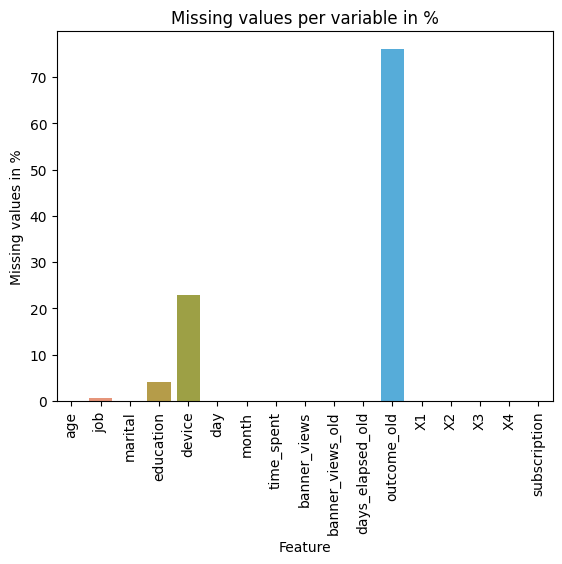

In [ ]:
# Making a copy
df = subs_no_Id.copy()

# Replacing "na" with formal NaN
for col in df:
    df[col].replace("na", np.nan, inplace=True)

# Check presence of NaN
print(" Missing values")
print(df.isnull().sum())

# Use percentages
print("\n Missing values in %")
missing_percent = (df.isnull().sum() / len(df) * 100).round(1)
missing_percent

# Visual representation
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90)
plt.ylabel("Missing values in %")
plt.xlabel("Feature")
plt.title("Missing values per variable in %")
plt.show()

We observe that "outcome_old" present 6804 NaN. This number is huge and accounts for 76% of the dataset.
Device has also a lot of NaN: 2050 oversations which accounts for 22.9% of the dataset.
Education and job have also missing values, but in smaller proportions, respectively 4.2% and 0.7%.

<Axes: >

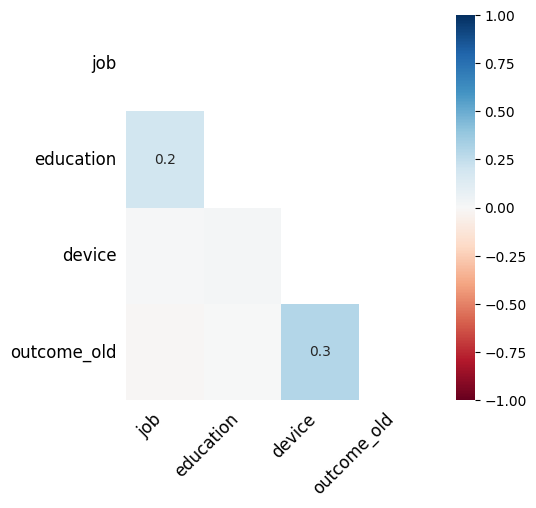

In [ ]:
msno.heatmap(df, figsize=(5,5), fontsize=12)

Looking at the correlations about the missing data, we observe that there is a slight correlation between the missing values for education with job and device with outcome_old. Since the imputation will remove this information, we might consider using a dummy variable to symbolize this correlation and retain the information. However, the correlations are not that high, so that might be unnecessary and perhaps potentially harmful.

##### Test set

 Missing values
Id                     0
age                    0
job                   21
marital                0
education            160
device               901
day                    0
month                  0
time_spent             0
banner_views           0
banner_views_old       0
days_elapsed_old       0
outcome_old         2937
X1                     0
X2                     0
X3                     0
X4                     0
dtype: int64

 Missing values in %


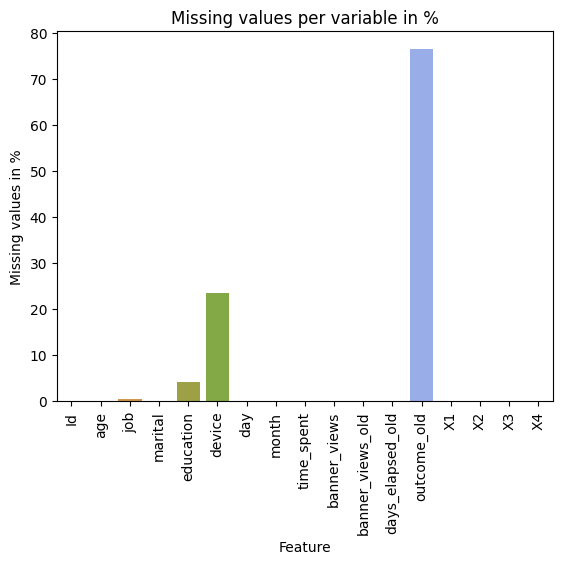

In [ ]:
# Replacing "na" with formal NaN
for col in test:
    test[col].replace("na", np.nan, inplace=True)

# Check presence of NaN
print(" Missing values")
print(test.isnull().sum())

# Use percentages
print("\n Missing values in %")
missing_percent = (test.isnull().sum() / len(test) * 100).round(1)
missing_percent

# Visual representation
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90)
plt.ylabel("Missing values in %")
plt.xlabel("Feature")
plt.title("Missing values per variable in %")
plt.show()

A similar situation happens with the test set, but with slighlty different values.

<Axes: >

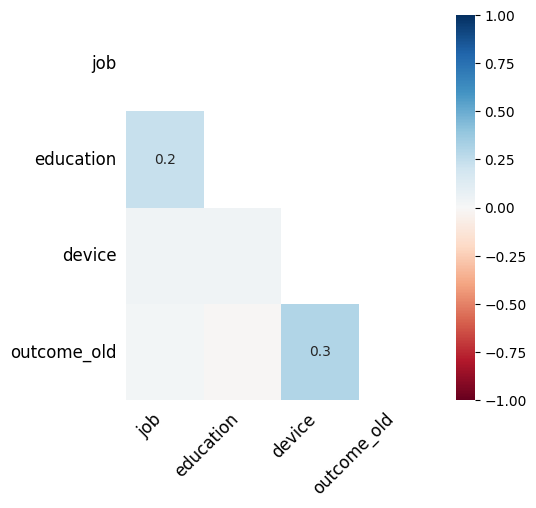

In [ ]:
msno.heatmap(test, figsize=(5,5), fontsize=12)

The same correlations appear in the test set as well.

#### Dealling with missing values


We choose to not replace the NaN from "outcome_old". As their number is huge, we might influence badly the algorithms if we do an imputation on this feature. Also, there is some meaning to keeping the NA"s since they represent the user not having seen the old campaign. It is not actually missing data in this sense. However, we will use a "mode" imputation for the variables "education" and "job" as the NA"s associated to these variables seem random and do not contain information in themselves. Let"s apply it on the train set and the test set.



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop("subscription", axis=1), df["subscription"], test_size=0.3, random_state=42)


# Impute missing values in the training set
job_mode = X_train["job"].mode()[0]
education_mode = X_train["education"].mode()[0]
X_train["job"].fillna(job_mode, inplace=True)
X_train["education"].fillna(education_mode, inplace=True)

# Impute missing values in the test set
job_mode_t = X_test["job"].mode()[0]
education_mode_t = X_test["education"].mode()[0]
X_test["job"].fillna(job_mode_t, inplace=True)
X_test["education"].fillna(education_mode_t, inplace=True)

In [ ]:
# filling nan with unknown string
X_train["outcome_old"] = X_train["outcome_old"].cat.add_categories(["unknown"])
X_train["outcome_old"].fillna("unknown", inplace=True)

X_train["device"] = X_train["device"].cat.add_categories(["unknown"])
X_train["device"].fillna("unknown", inplace=True)

X_test["outcome_old"] = X_test["outcome_old"].cat.add_categories(["unknown"])
X_test["outcome_old"].fillna("unknown", inplace=True)

X_test["device"] = X_test["device"].cat.add_categories(["unknown"])
X_test["device"].fillna("unknown", inplace=True)



In [ ]:
# Transform categorical variables into dummy variables in the training set
X_train = pd.get_dummies(X_train, drop_first=True)

# Transform categorical variables into dummy variables in the test set
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# TEST SET

# Mode for "job" and for "education"
job_mode_test = test["job"].mode()[0]
education_mode_test = test["education"].mode()[0]

# Replacing missing values with the mode
test["job"].fillna(job_mode_test, inplace=True)
test["education"].fillna(education_mode_test, inplace=True)
# Add "unknown" to categories
test["outcome_old"] = test["outcome_old"].cat.add_categories(["unknown"])
test["device"] = test["device"].cat.add_categories(["unknown"])

test["outcome_old"].fillna("unknown", inplace=True)
test["device"].fillna("unknown", inplace=True)


In [ ]:
# Create a reference (useful when applying transformation for specific model)
X_train_baseline = X_train.copy()
X_test_baseline = X_test.copy()
y_train_baseline = y_train.copy()
y_test_baseline = y_test.copy()

In [ ]:
# define folds for CV
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
# Check on train set
print(X_train.isnull().sum())

# Check on test set
print(test.isnull().sum())

age                      0
day                      0
month                    0
time_spent               0
banner_views             0
banner_views_old         0
days_elapsed_old         0
X1                       0
X2                       0
X3                       0
X4                       0
job_freelance            0
job_housekeeper          0
job_industrial_worker    0
job_manager              0
job_retired              0
job_salesman             0
job_student              0
job_teacher              0
job_technology           0
job_unemployed           0
marital_married          0
marital_single           0
education_high_school    0
education_university     0
device_smartphone        0
device_unknown           0
outcome_old_other        0
outcome_old_success      0
outcome_old_unknown      0
dtype: int64
Id                  0
age                 0
job                 0
marital             0
education           0
device              0
day                 0
month               0
t

### 2.4 Feature engineering

We chose to standardize the data for the models: logistic regression, ....

Also, we considered adding the following variables:


*   seen_old_campaign taking 1 or 0 depending on whether the visitor has seen the old campaign based on outcome_old and days_elapsed_old
*   job_edu_miss taking 1 if both are values are missing for the same observation and 0 otherwise. This variable intended to capture the loss of information from the imputation considering that there was a small correlation between the missing values.
*   If a user has no old banner views, no old days elapsed or old outcomes. If this is the case, creating an indicator ("missing_old_info" 1 if yes 0 otherwise) variable for this pattern .



However, since they did not bring significant improvement to the models, we chose to not include them in the end as it would be unecessary complexification.





## 3. Methods





Description of the best predictive model used, comparison of different methods, tuning parameters analysis, model selection approach

### General approach

Firstly, we select models that could be used for in our case (i.e. binary classification). <br> Secondly, we split our data into a training and testing set:


*   Training set: 70%
*   Testing set: 30%

Using the training set, we optimize the parameters in order to maximize the accuracy. The accuracy is based on 10-fold cross-validation, and the optimization is done using GridSearchCV from scikit-learn or HalvingGridSearchCV. While the first is an exhaustive approach that will yield the optimal solution (for the set of tested hyperparameters), the second approach is a more computing efficient solution that will yield a good result, but it is likely not the optimal solution. However, due to the efficiency of this approach, we are able to test more hyperparameters than with the exhaustive approach. As a result, this can lead to a better model.  <br> <br> The model optimized with the grid search is then evaluted in terms of training accuracy and test accuracy (based on the 20% test set). <br>
Finally, we compare the results of the different models and choose the best one. This model is fitted on the whole data set that we have at our disposal and uses the best hyperparameters that were determined. This final model is used to make the prediction for Kaggle using the data set containing features only.


### Candidates models

For binary classification we have the following options at our disposal:


* Logistic Regression
* K-nearest neighbors (kNN)
* Quadratic Discriminant Analysis (QDA)
* Linear Discriminant Analysis (LDA)
* Neural Net
* Decision tree
* Random Forest
* Bagging
* Boosting
* Support Vector Machine (SVM)
* Histogram-based Gradient Boosting Classification Tree

We excluded the followings models from our approach and kept the remaining ones:
* kNN, because this method is sensitive to missing values and outliers. Our data set present a lot of these issues. Even if assuming to use data imputation, we expect a large resulting bias. Another aspect was the computation cost as this method is known to be time consuming to find the optimal "k" number of clusters. Furthermore, we avoided this method because of the curse of dimensionality affecting it.
* Linear Discriminant Analysis was not used directly for classification as we prefered the quadriatic alternative which is more flexible. However, we wanted to benefit of LDA properties and included it into the pipeline before computing QDA.

### Logistic regression

The logistic regression is a rather simple model that associates a probability to an outcome. Depending on this probability, the logistic regression classifies the outcome as 1 or 0. A probability below 0.5 will result in a prediction of 0 and 1 otherwise. The probability is based on the logit transformation.

**With standardization only**

In [ ]:
# Importing Logistic Regression from scikit-learn
base_logi = LogisticRegression()

# Creating a dictionary of hyperparameters to tune
hyper_params = {
    # "solver" refers to the algorithm to use in the optimization problem.
    # Options are "newton-cholesky", "lbfgs", "liblinear", "sag", "saga". Default is "lbfgs".
    "logisticregression__solver": ["sag", "saga", "lbfgs", "liblinear", "newton-cholesky"],

    # "fit_intercept" specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    "logisticregression__fit_intercept": [True, False],

    # "penalty" is used to specify the norm used in the penalization (regularization).
    # Options are "none", "l1", "l2", "elasticnet". Default is "l2".
    "logisticregression__penalty": [None, "l2", "l1", "elasticnet"],

    # "C" is the inverse of regularization strength; smaller values specify stronger regularization.
    # It"s a positive float, default is 1.0.
    "logisticregression__C": np.logspace(-20, 20, num=41),

    # "class_weight" is used to set the parameter C of class i to class_weight[i]*C for SVC.
    # If not given, all classes are supposed to have weight one.
    # The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies.
    "logisticregression__class_weight": [None, "balanced"],

    # "random_state" is the seed of the pseudo random number generator to use when shuffling the data.
    "logisticregression__random_state": [1],

    # "max_iter" is the maximum number of iterations for the solvers to converge.
    "logisticregression__max_iter": [5000]
}

# Creating a pipeline which first standardizes the data then applies logistic regression
pipeline = make_pipeline(StandardScaler(), base_logi)

# Using GridSearchCV to search over specified parameter values for an estimator
logicv = GridSearchCV(estimator=pipeline,  # The estimator object
                      param_grid=hyper_params,  # Dictionary with parameters names as keys and lists of parameter settings to try as values
                      cv=folds,  # Determines the cross-validation splitting strategy
                      n_jobs=-1,  # Number of jobs to run in parallel
                      refit=True,  # Refit an estimator using the best found parameters on the whole dataset
                      verbose=1)  # Controls the verbosity: the higher, the more messages

# Fitting the GridSearchCV object to the data
logicv.fit(X_train, y_train)


Fitting 10 folds for each of 3280 candidates, totalling 32800 fits


c:\Users\rodui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
14760 fits failed out of a total of 32800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\rodui\AppData\Local\Programs\Python\Python31

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-20, 1.e-19, 1.e-18, 1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13,
       1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03...
       1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16, 1.e+17, 1.e+18, 1.e+19,
       1.e+20]),
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__fit_intercept': [True, False],
                         'logisticregression__max_iter': [5000],
                         'logisticregression__penalty': [None, 'l2', 'l1',
                                                         'elasticnet'],
                         'logisticregression__random_state': [1],
                         'logisticregression__solver': ['sag', 'saga', 'lbfgs',
                                                        'liblinear',
                                                        'newton-cholesky']},
             verbose=1)

#### Performance

In [ ]:
logi_results = logicv.cv_results_
best_logi_p = logicv.best_params_
best_logi_score =  logicv.best_score_
print("Best Hyper Parameters:\n",best_logi_p)
print("Best Score:\n",best_logi_score)

Best Hyper Parameters:
 {'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__fit_intercept': False, 'logisticregression__max_iter': 5000, 'logisticregression__penalty': 'l1', 'logisticregression__random_state': 1, 'logisticregression__solver': 'saga'}
Best Score:
 0.8305188253817816


The best hyper parameters yield an accuracy of ~83 % on the 10-fold cross-validation.

In [ ]:
logi_y_train_pred = logicv.predict(X_train)
logi_train_accuracy = accuracy_score(y_train, logi_y_train_pred)
print("Training Accuracy:\n",logi_train_accuracy)


grid_predictions = logicv.predict(X_test)
logi_test_accuracy = accuracy_score(y_test, grid_predictions)
print("Test Accuracy:\n",logi_test_accuracy)


Training Accuracy:
 0.8313118416852857
Test Accuracy:
 0.8242740134028295


The training accuracy is slighlty higher than the test accuracy, but it is not too apparent.

In [ ]:
# Dataframe to store the results
results = pd.DataFrame(columns=["Method", "Training", "Test", "CV"])
results = results.append({"Method": "Logi",
                                  "Training": logi_train_accuracy,
                                  "Test": logi_test_accuracy,
                                  "CV": best_logi_score}, ignore_index=True)

C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\2725672749.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method": "Logi",


In [ ]:
print(results)

  Method  Training      Test        CV
0   Logi  0.831312  0.824274  0.830519


### Quadratic Discriminant Analysis (QDA)

In [ ]:
# Tuning for regularization
param_grid = {
    "qda__reg_param": [0.01, 0.3, 0.6, 0.8, 1]
}

# Pipeline
pipe_qda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis()),
    ("qda", QuadraticDiscriminantAnalysis())
])

# Tuning
grid_search = GridSearchCV(estimator=pipe_qda,
                           param_grid=param_grid,
                           n_jobs=-1,
                           refit=True,
                           cv=folds)

grid_search.fit(X_train, y_train)

# Best tuning
best_param = grid_search.best_params_
print("Best hyperparameters:", best_param)

# Cross-validation
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=folds)
score = scores.mean()
print("Cross-validation accuracy:",score)

# Best tuned pipeline
pipe_qda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis()),
    ("qda", QuadraticDiscriminantAnalysis(reg_param=best_param["qda__reg_param"]))
])
# Fit
pipe_qda.fit(X_train, y_train)

# Predict training data
y_train_pred = pipe_qda.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", np.round(train_acc, 3))

# Predict test data
y_test_pred = pipe_qda.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", np.round(test_acc, 3))

Best hyperparameters: {'qda__reg_param': 1}
Cross-validation accuracy: 0.8110463131398056
Training accuracy: 0.811
Test accuracy: 0.807


We were creative in the procedure of this QDA model knowing that LDA and QDA relies on different assumption for the covariance matrix. Indeed, we found out that adding a LDA procedure before a QDA increases the overal accuracy by around 9%. As we are not interested in explaining the variables, but rather in prediction capacity we found this approach relevant.

Here are the steps to proceed with our QDA model. We used mode imputation on predictors "jobs" and "education". Then we standardized all predictors to make the data more normal. This is an assumption that we should satisfy for the next function. Indeed, we continued with Linear Discriminant Analysis. This algorithm relies on the assumption that the data has a gaussian distribution, and we saw previously that our data might not be normally distributed. Transforming the data helps to be closer of this assumption. After LDA we finally applied QDA wher we used a grid search to find the best tuning. It results in a regularization value of 1.

As said earlier, we also tried to predict our model without LDA, but the performance in accuracy where worse. We decided to keep it as it brings improvement.

The accuracies are the following:

In [ ]:
# Add QDA accuracy values to the dataframe
results = results.append({"Method":"QDA",
                          "Training": train_acc,
                          "Test": test_acc,
                          "CV":score}, ignore_index=True)
print(results)

  Method  Training      Test        CV
0   Logi  0.831312  0.824274  0.830519
1    QDA  0.811044  0.807148  0.811046


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\3091015131.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":"QDA",


### Neural Net

We decided to continue with a Deep Neural Network as this model is very flexible. The model can capture complex relationships between variables, however this property comes with the cost of being prone to overfitting. Technics such as regularization, early stopping and dropout can be used to reduce the chances of overfit. The model is initialized with small random weights and then use activation functions. The weights are then updated according to an optimizer such as Adam for example.

In [ ]:
# Split the train data for obtaining a valdiation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=1)

# Need to normalize data (scale)
normalize = MinMaxScaler()

# List of variable names to normalize
variables_normalize = ["age", "day", "month", "time_spent","banner_views","banner_views_old","days_elapsed_old"]

# Apply normalization
normalize.fit(X_train[variables_normalize]) # Fit
X_train[variables_normalize] = normalize.transform(X_train[variables_normalize]) # X_train
X_val[variables_normalize] = normalize.transform(X_val[variables_normalize]) # X_val
X_test[variables_normalize] = normalize.transform(X_test[variables_normalize]) # X_test

In [ ]:
# Stop
stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=0)

# Loss
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

# Regularization - L1: Lasso
regularization = 0.001

# Neural Net model function
def NN_model(optimizer=optimizer, regularization=regularization):
    model = keras.models.Sequential([
        keras.layers.Dense(units=40,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l1(regularization)),
        keras.layers.Dense(units=30,
                           activation="relu",
                           kernel_regularizer=keras.regularizers.l1(regularization)),
        keras.layers.Dropout(rate=0.1),
        keras.layers.Dense(units=1, activation="sigmoid")
    ])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# KerasClassifier
model = KerasClassifier(build_fn=NN_model)

param_grid = {
    "optimizer": ["Adam","SGD"],
    "batch_size": [32,64],
    "epochs": [50,100,150],
    "regularization": [0.0001, 0.001, 0.01]
}


# CV and tuning
search = HalvingGridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=folds,
                           scoring=make_scorer(accuracy_score),
                          n_jobs =-1)

# Fit
NN_fit = search.fit(X_train, y_train, verbose=0)

# Best parameters
print("Best parameters:",(NN_fit.best_score_, NN_fit.best_params_))

# Fit the train set with best parameters
best_parameters = search.best_params_
model_best_para = KerasClassifier(build_fn=NN_model, **best_parameters)
NN_best_param = model_best_para.fit(X_train, y_train, validation_data=(X_val, y_val),
                    callbacks=[stopping], verbose=0)


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\1468373834.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=NN_model)
c:\Users\rodui\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: (0.825294117647059, {'batch_size': 64, 'epochs': 100, 'optimizer': 'Adam', 'regularization': 0.001})


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\1468373834.py:51: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_best_para = KerasClassifier(build_fn=NN_model, **best_parameters)


 Knowing that this algorithm can overfit quickly, we took care in our approach when implementing it. The first thing we did was to normalize the data as this step is important for a neural net. We apply the standardization separately between the different dataset as we do not want information leakage that could be used to "cheat" on the predictions. The resulting values range now between 0 and 1. Then, our approach to find the best tuning relied on trials and cross-validation. We tried different architectures based on CV before proposing the final one displayed in the notebook. We wanted to avoid overfitting by keeping the quantity of model"s parameters less than the sample size. A good formula found consisted of 1 hidden layer with 40 neurons followed by a second hidden layer with 30 neurons. Both of them use an activation function based on ReLu. ReLu was chosen as it is adapted to nonlinear patterns. Additionally, we used a regularization function, the Least Absolute Shrinkage and Selection Operator (Lasso or L1) to include penalizations to the model. Indeed, we wanted to address overfitting with Lasso"s properties. Lasso can help in feature selection by decreasing the effect given to less important features. This function has also been found to provide a slightly better accuracy than its alternative Ridge Regression (L2).

We decided to apply a sigmoid function for the final layer. The softmax function that we have seen in class could have been used, but is more suited for multiple outcomes while sigmoid is well suited for classification when the outcome is binary. In our case, the classification relies on a binary outcome.

With respect to optimizing functions, we tried the "stochastic Gradient Descent" (SDG) and "Adams". The gradient descent can be very interesting, but its capacity to remain stuck in a local minimum was a major issue that we wanted to avoid. We wanted our method to start large and then converge with more precision. Moreover, we found the Adam optimizer satisfying for its faster and good results and decided to include it.

We selected a learning rate that was not too large to not diverge by passing important information, but neither too low to reduce computing time. Different trials showed that 0.0001 was an efficient value.

Our loss function consisted in a binary cross entropy as we had to deal with binary classification problems.

The remaining hyperparameters such as the number of epochs, the batch size and regularization values relied on cross-validation.


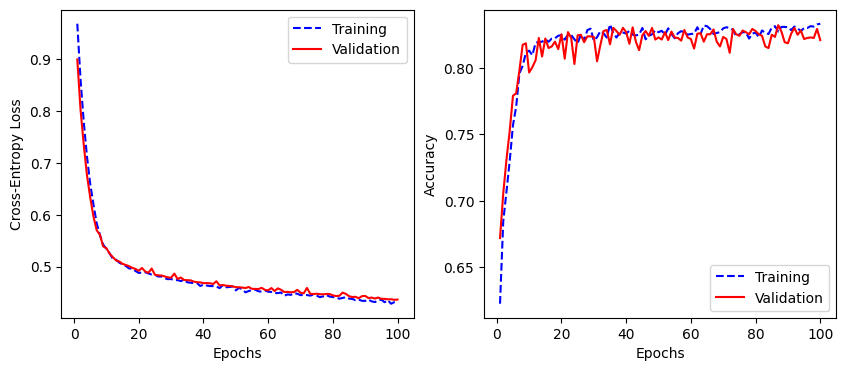

Neural Net on training data: 0.835
Neural Net on test data: 0.818


In [ ]:
# Function for plot of learning curve
def plot_training(history_dict):
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, "b--", label="Training")
    plt.plot(epochs, val_loss, "r-", label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Cross-Entropy Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, "b--", label="Training")
    plt.plot(epochs, val_acc, "r-", label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")

    plt.show()

# Plot
plot_training(NN_best_param.history)

# Calculate the accuracy values for the NN method with best parameters
_, NN_train_acc = model_best_para.model.evaluate(X_train, y_train, verbose=0)
_, NN_test_acc = model_best_para.model.evaluate(X_test, y_test, verbose=0)
NN_train_acc = round(NN_train_acc, 3)
NN_test_acc = round(NN_test_acc, 3)
print("Neural Net on training data:", NN_train_acc)
print("Neural Net on test data:", NN_test_acc)

# Set X to reference baseline
X_test = X_test_baseline.copy()
X_train = X_train_baseline.copy()
y_train = y_train_baseline.copy()
y_test = y_test_baseline.copy()

Learning curves are useful visual way to assess the fit of the model. From the loss curve displayed we can see that the validation curve and the train curve are not too far neither too similar in their shape. We can conclude that the fit is acceptable as it does not underfit or overfit.



In [ ]:
# Add Neural Net accuracy values to the dataframe
results = results.append({"Method":
                          "Neural Net",
                          "Training": NN_train_acc,
                          "Test": NN_test_acc,
                          "CV":NN_fit.best_score_}, ignore_index=True)

C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\3913092733.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":


### Decision Tree

A decision tree is a powerful method used to predict a categorical response (e.g., "yes" or "no" in our case). This means that it is applied when the outcome variable (or target) is categorical, denoted by Y ∈ G = {1, ..., q}. When building a Classification Tree, we start with a full tree, and the data is divided into distinct regions Rj. The prediction for a given input is determined by the most frequently occurring class of the training observations in the region where that input falls. In other words, if the input lands in a region where the majority of training observations were of class "1", the classifier will predict class "1".

The issue with the full tree is that it gives us zero training error, meaning it is very flexible. Therefore, we will apply a process of pruning, which simplifies the tree by cutting off less important branches. Additionally, we will use the entropy measure to penalize misclassifications



#### Full tree

In [ ]:
# Create a decision tree criterion set to "entropy"
tree_full = DecisionTreeClassifier(criterion="entropy")

# Train the tree
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# polt full tree ################################## TO DELETE: Take computational time
#plt.figure(figsize=(16,14))
#plot_tree(tree_full, feature_names=X_train.columns.tolist(), impurity=False, label="root",
#          filled=True, proportion=True, rounded=True, fontsize=8)
#plt.show()

In [ ]:
# training accuracy
print("Train accuracy:", tree_full.score(X_train,y_train))
# test accuracy
print("Test accuracy:", tree_full.score(X_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.7937453462397617


#### Cost-complexity pruning

We want to use cross validation to find best alpha the tuning parameters to avoid overfitting from the full tree

In [ ]:
# Compute the cost complexity pruning path
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
grid_alphas = ccp_alphas
grid_alphas = np.logspace(-5, 1, 100)

In [ ]:
# tunning hyper-parameters using CV
tree_full = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0)
hyper_params = {"ccp_alpha": grid_alphas}
treeCV = GridSearchCV(estimator = tree_full,
                      scoring="accuracy",
                      param_grid = hyper_params,
                      cv = folds)

In [ ]:
# Run CV
treeCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0, criterion='entropy'),
             param_grid={'ccp_alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.3366992...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01])},
             scoring='accuracy')

In [ ]:
pd.DataFrame(treeCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032764,0.001416,0.001703,0.000459,0.00001,{'ccp_alpha': 1e-05},0.795853,0.802233,0.814992,0.802233,0.791069,0.763955,0.801917,0.771565,0.792332,0.805112,0.794126,0.014775,44
1,0.032041,0.000751,0.001450,0.000568,0.000011,{'ccp_alpha': 1.1497569953977357e-05},0.795853,0.797448,0.810207,0.786284,0.800638,0.775120,0.811502,0.790735,0.793930,0.798722,0.796044,0.010176,36
2,0.032101,0.000483,0.001509,0.000451,0.000013,{'ccp_alpha': 1.3219411484660286e-05},0.800638,0.816587,0.802233,0.795853,0.805423,0.773525,0.798722,0.784345,0.790735,0.789137,0.795720,0.011382,37
3,0.033298,0.001318,0.001605,0.000432,0.000015,{'ccp_alpha': 1.5199110829529332e-05},0.799043,0.808612,0.814992,0.784689,0.778309,0.776715,0.808307,0.789137,0.787540,0.792332,0.793968,0.012586,45
4,0.032926,0.000954,0.001504,0.000497,0.000017,{'ccp_alpha': 1.747528400007683e-05},0.802233,0.808612,0.810207,0.783094,0.794258,0.771930,0.809904,0.779553,0.787540,0.795527,0.794286,0.012865,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.033400,0.000418,0.001676,0.000448,5.722368,{'ccp_alpha': 5.72236765935022},0.610845,0.574163,0.596491,0.591707,0.578947,0.598086,0.560703,0.568690,0.610224,0.563898,0.585375,0.017626,71
96,0.034123,0.000861,0.001826,0.000400,6.579332,{'ccp_alpha': 6.5793322465756825},0.610845,0.574163,0.596491,0.591707,0.578947,0.598086,0.560703,0.568690,0.610224,0.563898,0.585375,0.017626,71
97,0.033687,0.000952,0.001655,0.000555,7.564633,{'ccp_alpha': 7.56463327554629},0.610845,0.574163,0.596491,0.591707,0.578947,0.598086,0.560703,0.568690,0.610224,0.563898,0.585375,0.017626,71
98,0.033442,0.000982,0.001587,0.000445,8.69749,{'ccp_alpha': 8.697490026177835},0.610845,0.574163,0.596491,0.591707,0.578947,0.598086,0.560703,0.568690,0.610224,0.563898,0.585375,0.017626,71


In [ ]:
# best alpha according to one st rule
resCV = treeCV.cv_results_

test_Misclasif = 1 - resCV["mean_test_score"]
std_mean_err_test = resCV["std_test_score"] / np.sqrt(10)
alpha_grid = resCV["param_ccp_alpha"].data

index_best = treeCV.best_index_
best_alpha = treeCV.best_params_["ccp_alpha"]
one_se_rule_best_alpha = np.max(alpha_grid[test_Misclasif <= test_Misclasif[index_best] + std_mean_err_test[index_best]])

print("Best alpha:", best_alpha)
print("Best 1se alpha:", one_se_rule_best_alpha)

Best alpha: 0.0013219411484660286
Best 1se alpha: 0.0017475284000076847


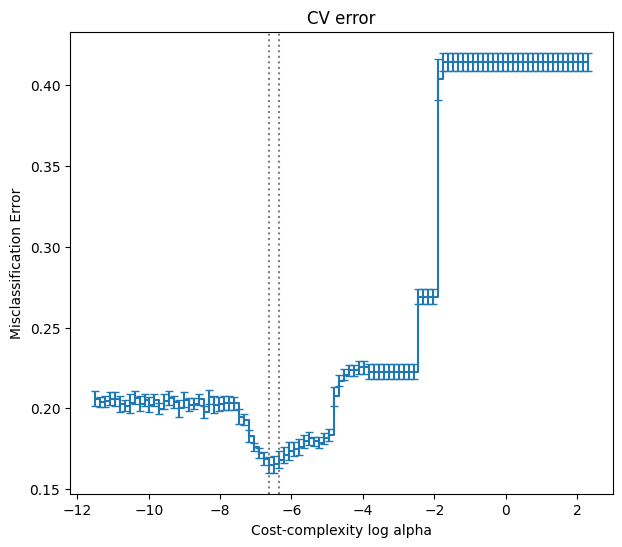

In [ ]:
# plotting the result
plt.figure(figsize=(7,6))
plt.errorbar(x=np.log(grid_alphas), y=test_Misclasif, yerr=std_mean_err_test, capsize=3, drawstyle="steps-post")#, fmt="o"

plt.axvline(np.log(best_alpha), ls="dotted", color="grey")#vertical line at the k yielding minimum CV MSE
plt.axvline(np.log(one_se_rule_best_alpha), ls="dotted", color="grey")#vertical line at best k value according to 1 std err rule

plt.title("CV error")
plt.xlabel("Cost-complexity log alpha")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# fit the best tree
tree_best = treeCV.best_estimator_

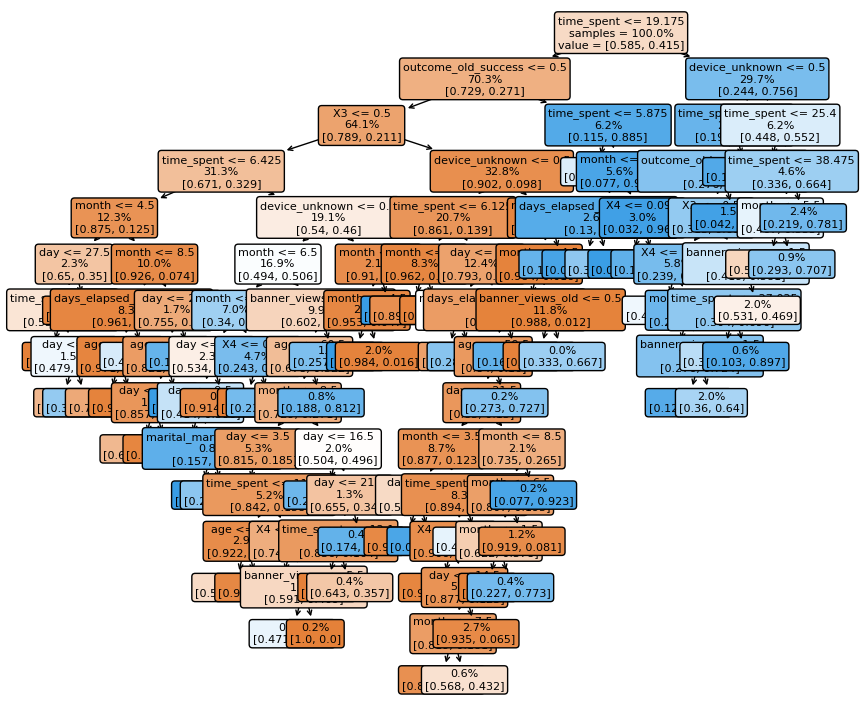

In [ ]:
# plotting the best tree
plt.figure(figsize=(10,9))
plot_tree(tree_best, feature_names=X_train.columns.tolist(), impurity=False, label="root",
          filled=True, proportion=True, rounded=True, fontsize=8)
plt.show()

In [ ]:
# Calculate the accuracy values for the Tree method
tree_train_acc = round(tree_best.score(X_train, y_train), 3)
tree_test_acc = round(tree_best.score(X_test, y_test), 3)
print("Tree Accuracy on training data:",tree_train_acc)
print("Tree Accuracy on test data:",tree_test_acc)

Tree Accuracy on training data: 0.869
Tree Accuracy on test data: 0.844


#### feature importances

In [ ]:
# Extract feature importances
feature_importances = tree_best.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})

# Sort the DataFrame by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)


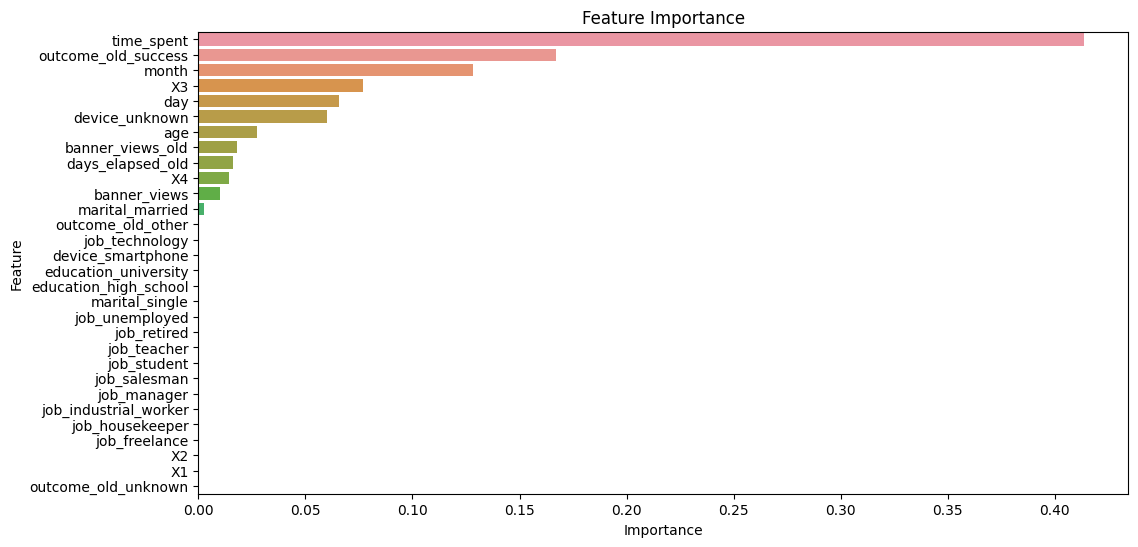

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Add tree accuracy values to the dataframe
results = results.append({"Method":"Tree",
                          "Training": tree_train_acc,
                          "Test": tree_test_acc,
                          "CV":treeCV.best_score_}, ignore_index=True)
print(results)

       Method  Training      Test        CV
0        Logi  0.831312  0.824274  0.830519
1         QDA  0.811044  0.807148  0.811046
2  Neural Net  0.835000  0.818000  0.825294
3        Tree  0.869000  0.844000  0.835145


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\3701478071.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":"Tree",


### Random Forests

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_features="sqrt", random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

#### Tune the Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, oob_score=True,
                             warm_start=False, random_state=1, n_jobs=-2)
rfc.fit(X_train, y_train)
rfc.oob_score_,

(0.8471113948292371,)

In [ ]:
hyperparam_grid={"max_features":[2,3,4,5,6,7],
                 "min_samples_leaf":[1,3,5,7,9,11]}

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, oob_score=True,
                             warm_start=False, random_state=1, n_jobs=-1)

In [ ]:
# Initialize HalvingGridSearchCV
search = HalvingGridSearchCV(rfc, hyperparam_grid)

# Fit on training data
search.fit(X_train, y_train)
best_params = search.best_params_

# Print the best parameters and score
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

Best parameters: {'max_features': 7, 'min_samples_leaf': 1}
Best score: 0.8503430743850542


In [ ]:
# Create a new classifier with the best parameters
rfc_best = RandomForestClassifier(**best_params)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_features=7)

In [ ]:
# Calculate the accuracy values for the RF method
rf_train_acc = round(rfc_best.score(X_train,y_train), 3)
rf_test_acc = round(rfc_best.score(X_test,y_test), 3)
print("Rf Accuracy on training data:",rf_train_acc)
print("Rf Accuracy on test data:",rf_test_acc)

Rf Accuracy on training data: 1.0
Rf Accuracy on test data: 0.856


In [ ]:
rf_cv_best_score = round(search.best_score_, 3)

# Add RF accuracy values to the dataframe
results = results.append({"Method":"RF",
                          "Training": rf_train_acc,
                          "Test": rf_test_acc,
                          "CV": rf_cv_best_score}, ignore_index=True)
print(results)

       Method  Training      Test        CV
0        Logi  0.831312  0.824274  0.830519
1         QDA  0.811044  0.807148  0.811046
2  Neural Net  0.835000  0.818000  0.825294
3        Tree  0.869000  0.844000  0.835145
4          RF  1.000000  0.856000  0.850000


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\2925298429.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":"RF",


### Bagging

Since decision trees tend to have low bias but high variance, we can solve this issue by employing the bagging method. By creating 200 trees in this process and averaging their variances, we can effectively reduce the overall variance.

However, bagging alone does not consider the correlation among the trees or address the issue of shared training observations. Random Forest, on the other hand, tackles these concerns by decorrelating the trees from the bootstrap dataset. By randomly selecting a subset of features for each split and training each tree independently, Random Forest effectively reduces the correlation and improves the overall performance compared to simple bagging.

In this part we will evalute the bagging method .

In [ ]:
bagging = RandomForestClassifier(n_estimators=200, max_features=None, random_state=1)
bagging.fit(X_train,y_train)

RandomForestClassifier(max_features=None, n_estimators=200, random_state=1)

In [ ]:
# Define the parameter grid for tuning the BaggingClassifier
hyperparam_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_samples": [0.5, 0.8, 1.0],
    "max_features": [0.5, 0.8, 1.0]
}

In [ ]:
# Initialize the BaggingClassifier with RandomForestClassifier as the estimator
bagging = BaggingClassifier(
    estimator=RandomForestClassifier(max_features=None, n_jobs=-1, random_state=1),
    n_jobs=-1,
    random_state=1
)

In [ ]:
# Initialize HalvingGridSearchCV
search = HalvingGridSearchCV(bagging, hyperparam_grid)

# Fit on training data
search.fit(X_train, y_train)
best_params = search.best_params_

# Print the best parameters and score
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

Best parameters: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}
Best score: 0.8527402604356572


In [ ]:
# Create a new classifier with the best parameters
bagging_best = RandomForestClassifier(**best_params)
bagging_best.fit(X_train, y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8, n_estimators=200)

In [ ]:
# Calculate the accuracy values for the bagging method
bagging_train_acc = round(bagging_best.score(X_train,y_train), 3)
bagging_test_acc = round(bagging_best.score(X_test,y_test), 3)
print("Bagging Accuracy on training data:",bagging_train_acc)
print("Bagging Accuracy on test data:",bagging_test_acc)

Bagging Accuracy on training data: 1.0
Bagging Accuracy on test data: 0.852


In [ ]:
bagging_best_cv_score = round(search.best_score_, 3)

# Add bagging accuracy values to the dataframe
results = results.append({"Method":"Bagging",
                          "Training": bagging_train_acc,
                          "Test": bagging_test_acc,
                          "CV": bagging_best_cv_score}, ignore_index=True)
print(results)

       Method  Training      Test        CV
0        Logi  0.831312  0.824274  0.830519
1         QDA  0.811044  0.807148  0.811046
2  Neural Net  0.835000  0.818000  0.825294
3        Tree  0.869000  0.844000  0.835145
4          RF  1.000000  0.856000  0.850000
5     Bagging  1.000000  0.852000  0.853000


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\744672426.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":"Bagging",


### Boosting

In this part we will introduce boosting method which is like bagging. Boosting works in a similar way as bagging, but the principle is to use many weak, high biased models with low variance, and combine them to reduce the bias. The main difference is that in boosting, the trees are grown sequentially: each tree is grown using information (learning rate)from previously grown trees.

In [ ]:
gbct = GradientBoostingClassifier(max_depth = 2, n_estimators = 1000, learning_rate = 0.01)
gbct.fit(X_train, y_train)
gbct.score(X_test, y_test)

0.8417721518987342

In [ ]:
# Initialize the GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=42)

hyperparam_grid = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500],
    "max_depth": [2, 3, 4, 5, 6]
}

In [ ]:
# Initialize HalvingGridSearchCV
search_bost = HalvingGridSearchCV(gbct, hyperparam_grid)

# Fit on training data
search_bost.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", search_bost.best_params_)
print("Best score:", search_bost.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}
Best score: 0.851620137229754


In [ ]:
#  fitted HalvingGridSearchCV object
best_params = search_bost.best_params_

# use 'best_params' to initialize GradientBoostingClassifier
best_gbct = GradientBoostingClassifier(**best_params)

# Fit model
best_gbct.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=1000)

In [ ]:
4# Calculate the accuracy values for the boosting method
boosting_train_acc = round(best_gbct.score(X_train,y_train), 3)
boosting_test_acc = round(best_gbct.score(X_test,y_test), 3)
print("Boosting Accuracy on training data:",boosting_train_acc)
print("Boosting Accuracy on test data:",boosting_test_acc)

Boosting Accuracy on training data: 0.887
Boosting Accuracy on test data: 0.856


In [ ]:
boosting_best_cv_score = round(search_bost.best_score_,3)

# Add boosting accuracy values to the dataframe
results = results.append({"Method":"Boosting",
                          "Training": boosting_train_acc,
                          "Test": boosting_test_acc,
                          "CV": boosting_best_cv_score}, ignore_index=True)
print(results)

       Method  Training      Test        CV
0        Logi  0.831312  0.824274  0.830519
1         QDA  0.811044  0.807148  0.811046
2  Neural Net  0.835000  0.818000  0.825294
3        Tree  0.869000  0.844000  0.835145
4          RF  1.000000  0.856000  0.850000
5     Bagging  1.000000  0.852000  0.853000
6    Boosting  0.887000  0.856000  0.852000


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\3020532733.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":"Boosting",


### Support Vector Machines (SVM)

The idea behind Support Vector Machines (SVM) that it enlarge the feature space in an automatic way.By using what so-called the kernel trick. It allows SVM to increase the feature space without actually doing it explicitly. We chose to use the polynomial kernel because it gave us better accuracy than other options.

In [ ]:
svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=1))
])

svm_poly_kern.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, coef0=1, kernel='poly'))])

In [ ]:
print("Train accuracy:", svm_poly_kern.score(X_train,y_train))
print("Test accuracy:", svm_poly_kern.score(X_test,y_test))

Train accuracy: 0.8766358123204596
Test accuracy: 0.8142218912881608


In [ ]:
# Kernel trick
# Polynomial
poly_kern_params = {"svm__degree": np.arange(2, 10),
                    "svm__coef0": [1, 5, 10],
                    "svm__C": [1, 10]}

svm_poly_kern = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly"))
])

In [ ]:
svm_poly_kern_cv = HalvingGridSearchCV(estimator = svm_poly_kern,
                           param_grid = poly_kern_params,
                           scoring = "accuracy",
                           cv = folds,
                            n_jobs=-1)

svm_poly_kern_cv.fit(X_train, y_train)
svm_best_score = svm_poly_kern_cv.best_score_

In [ ]:
# Print the best score and best parameters
print(f"Best CV accuracy score: {svm_best_score:.5f}")
print("Best parameters:", svm_poly_kern_cv.best_params_ )

Best CV accuracy score: 0.82273
Best parameters: {'svm__C': 1, 'svm__coef0': 5, 'svm__degree': 2}


In [ ]:
# Calculate the accuracy values for the boosting method
svm_train_acc = round(svm_poly_kern_cv.score(X_train,y_train), 3)
svm_test_acc = round(svm_poly_kern_cv.score(X_test,y_test), 3)
print("svm Accuracy on training data:",svm_train_acc)
print("svm Accuracy on test data:",svm_test_acc )

svm Accuracy on training data: 0.846
svm Accuracy on test data: 0.823


In [ ]:
# Add SV accuracy values to the dataframe
results = results.append({"Method":
                          "SVM",
                          "Training": svm_train_acc,
                          "Test": svm_test_acc,
                          "CV":svm_best_score}, ignore_index=True)

# Print the updated dataframe
print(results)

       Method  Training      Test        CV
0        Logi  0.831312  0.824274  0.830519
1         QDA  0.811044  0.807148  0.811046
2  Neural Net  0.835000  0.818000  0.825294
3        Tree  0.869000  0.844000  0.835145
4          RF  1.000000  0.856000  0.850000
5     Bagging  1.000000  0.852000  0.853000
6    Boosting  0.887000  0.856000  0.852000
7         SVM  0.846000  0.823000  0.822734


C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\537685046.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method":


### Histogram-based Gradient Boosting Classification Tree

This model has native support for missing values. Thus, contrary to the other models, missing values for job and education will not be imputed for this model.

**Preprocessing**

In [ ]:
# Only filling for outcome_old and device, keeping the NA's for job and education
X_train, X_test, y_train, y_test = train_test_split(df.drop("subscription", axis=1), df["subscription"], test_size=0.3, random_state=42)


# filling nan with unknown string
X_train['outcome_old'] = X_train['outcome_old'].cat.add_categories(['unknown'])
X_train['outcome_old'].fillna("unknown", inplace=True)

X_train['device'] = X_train['device'].cat.add_categories(['unknown'])
X_train['device'].fillna("unknown", inplace=True)

X_test['outcome_old'] = X_test['outcome_old'].cat.add_categories(['unknown'])
X_test['outcome_old'].fillna("unknown", inplace=True)

X_test['device'] = X_test['device'].cat.add_categories(['unknown'])
X_test['device'].fillna("unknown", inplace=True)

In [ ]:
# Function to encode the categorical variables
def encode_non_nans(df):
    # Initialize the encoder
    enc = OrdinalEncoder()

    # Select categorical columns
    cat_cols = df.select_dtypes(include=['category']).columns

    # Convert categorical columns to 'object' dtype
    df[cat_cols] = df[cat_cols].astype('object')

    # Apply the encoder to each column, but only to the rows where there are no NaN values
    for col in cat_cols:
        non_nan_idxs = df[col].notna()
        reshaped_vals = df.loc[non_nan_idxs, col].values.reshape(-1, 1) # reshaping because the encoder expects a 2D array
        encoded_vals = enc.fit_transform(reshaped_vals)

        # Replace non-NaN values with encoded values
        df.loc[non_nan_idxs, col] = encoded_vals

    # Convert columns back to 'category'
    df[cat_cols] = df[cat_cols].astype('category')

    return df

X_train, X_test = encode_non_nans(X_train),encode_non_nans(X_test)

**Tuning**

In [ ]:
base_hist = HistGradientBoostingClassifier()
hyper_params = {
    "loss": ["binary_crossentropy", "auto", "log_loss"],
    "learning_rate": np.arange(0.01,0.1,step=0.025),
    "max_iter": [100,200],
    "max_leaf_nodes": [15,31,63],
    "min_samples_leaf": np.arange(30,50,step=4),
    "l2_regularization": np.logspace(-3,-1,num=5),
    "max_bins": [125,255],
    "categorical_features": [np.array(["job","marital","education","device","outcome_old"]),None],


}
histCV = GridSearchCV(estimator = base_hist,
                      param_grid = hyper_params,
                      cv = folds,
                      n_jobs=-1,
                      refit=True,
                      verbose =1)


In [ ]:
histCV.fit(X_train,y_train)

Fitting 10 folds for each of 7200 candidates, totalling 72000 fits


c:\Users\rodui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py:1998: FutureWarning: The loss 'binary_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'categorical_features': [array(['job', 'marital', 'education', 'device', 'outcome_old'],
      dtype='<U11'),
                                                  None],
                         'l2_regularization': array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ]),
                         'learning_rate': array([0.01 , 0.035, 0.06 , 0.085]),
                         'loss': ['binary_crossentropy', 'auto', 'log_loss'],
                         'max_bins': [125, 255], 'max_iter': [100, 200],
                         'max_leaf_nodes': [15, 31, 63],
                         'min_samples_leaf': array([30, 34, 38, 42, 46])},
             verbose=1)

#### Performance

In [ ]:
hist_results = histCV.cv_results_
best_hist_p = histCV.best_params_
best_hist_score =  histCV.best_score_
print("Best Hyper Parameters:\n",best_hist_p)
print("Best Score:\n",best_hist_score)

Best Hyper Parameters:
 {'categorical_features': None, 'l2_regularization': 0.03162277660168379, 'learning_rate': 0.060000000000000005, 'loss': 'binary_crossentropy', 'max_bins': 125, 'max_iter': 200, 'max_leaf_nodes': 15, 'min_samples_leaf': 30}
Best Score:
 0.8616396859124285


In [ ]:
hist_y_train_pred = histCV.predict(X_train)
hist_train_accuracy = accuracy_score(y_train, hist_y_train_pred)
print("Training Accuracy:\n",hist_train_accuracy)


grid_predictions_hist = histCV.predict(X_test)
hist_test_accuracy = accuracy_score(y_test, grid_predictions_hist)
print("Test Accuracy:\n",hist_test_accuracy)

Training Accuracy:
 0.9002553463134376
Test Accuracy:
 0.8663440059568132


In [ ]:
# Dataframe to store the results
results = results.append({"Method": "HistBoostTree",
                                  "Training": hist_train_accuracy,
                                  "Test": hist_test_accuracy,
                                  "CV": best_hist_score}, ignore_index=True)

C:\Users\rodui\AppData\Local\Temp\ipykernel_21180\3778451243.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Method": "HistBoostTree",


## 4. Best model diagnostics and final Kaggle prediction


## **Comparaison models + PLOT (CV, TRAIN, TEST)**

### Comparison of models: *training* against *test*

In [ ]:
print(results)

          Method  Training      Test        CV
0           Logi  0.831312  0.824274  0.830519
1            QDA  0.811044  0.807148  0.811046
2     Neural Net  0.835000  0.818000  0.825294
3           Tree  0.869000  0.844000  0.835145
4             RF  1.000000  0.856000  0.850000
5        Bagging  1.000000  0.852000  0.853000
6       Boosting  0.887000  0.856000  0.852000
7            SVM  0.846000  0.823000  0.822734
8  HistBoostTree  0.900255  0.866344  0.861640


Finally, we obtained the list of different accuracies for each model with respect to model predictin the train set, test set, and the results for cross-validation.
When looking at prediction for the train set, we notice that [name] is the best performer, however when looking at the test set [...] is better. Nonetheless, tho have a robust comparison we should take in consideration the cross-validation results. As a remainder we used 10 folds. We observe that [...] performs the best on our data set.

In [ ]:
# Find the maximum CV score
value_max = results["CV"].max()

#Extract the name of maximum CV score
name_max = results.loc[results["CV"] == value_max, "Method"].values[0]

# Result printed
print("The best model is", name_max,"and its CV value is ",value_max )

The best model is HistBoostTree and its CV value is  0.8616396859124285


#### Bar plots

##### *Training* and *test*

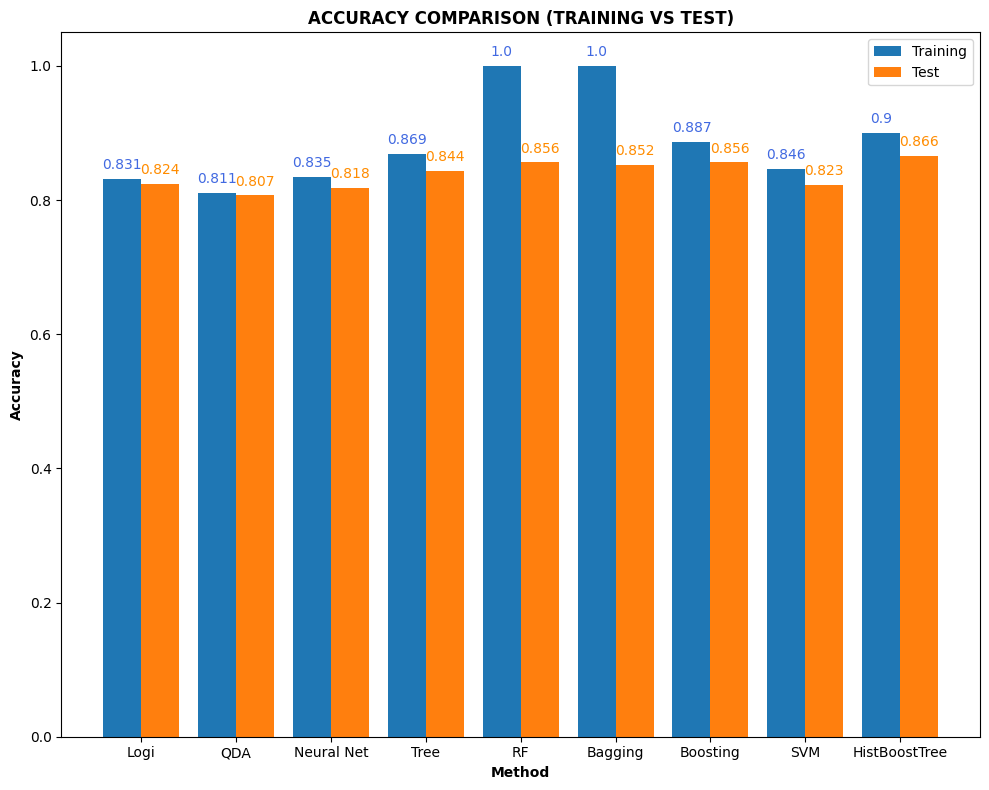

In [ ]:
# Bars
x = np.arange(len(results))
plt.figure(figsize=(10, 8))

# Create a bar plot
plt.bar(x - 0.2, results["Training"], width=0.4, label="Training")
plt.bar(x + 0.2, results["Test"], width=0.4, label="Test")

plt.xlabel("Method", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.title("ACCURACY COMPARISON (TRAINING VS TEST)",weight="bold")
plt.legend()

# Text
for i in range(len(results)):
    plt.text(x[i] - 0.2, results["Training"][i] + 0.01, str(round(results["Training"][i], 3)), ha="center", va="bottom", color="royalblue")
    plt.text(x[i] + 0.2, results["Test"][i] + 0.01, str(round(results["Test"][i], 3)), ha="center", va="bottom", color="darkorange")

plt.xticks(x, results["Method"])

# Plot
plt.tight_layout()
plt.show()

##### Cross-validation

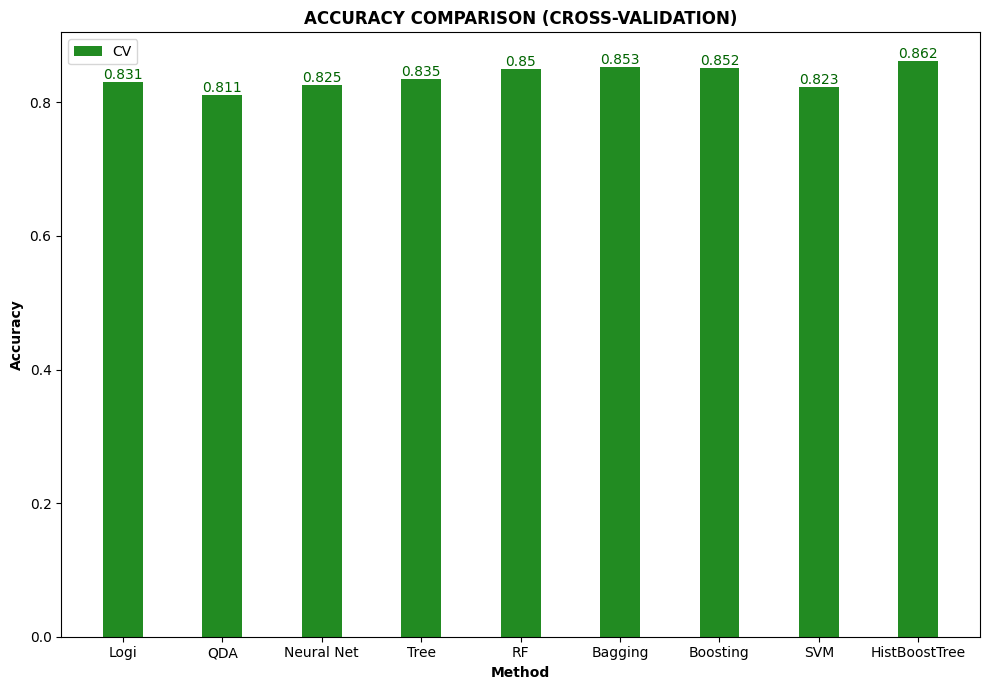

In [ ]:
# Bars
x = np.arange(len(results))
plt.figure(figsize=(10, 7))

# Create a bar plot
plt.bar(x, results["CV"], width=0.4, label="CV", color="forestgreen")
plt.xlabel("Method", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.title("ACCURACY COMPARISON (CROSS-VALIDATION)", weight="bold")
plt.legend()

# Text
for i in range(len(results)):
    plt.text(x[i], results["CV"][i], str(round(results["CV"][i], 3)), ha="center", va="bottom", color="darkgreen")
plt.xticks(x, results["Method"])

# Plot
plt.tight_layout()
plt.show()

#### Confusion Matrix
Best model
Graph de proba / courbe

To identify our best model we fitted the models on the whole train data set in order to predict the test dataset. We used then cross-validation to obtain reliable values for accuracies. By proceeding with this maners, we increased the likelihood to have good comparison between models.

 As we can see from the plots above...[comparison] performs better than [...] while [...] is the worst model overal. We deduce that this dataset is likely to require rather a .... way of processing data to classificate well the outcome value.


Hence, our final choice relies on  [...]



In [ ]:
# Load values
actual = y_test
predicted = grid_predictions_hist

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Individual report
report = classification_report(actual, predicted)
print(report)

# Overal report
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)


print("Accuracy:", accuracy.round(3))
print("Overal precision:", precision.round(3))
print("Overal recall:", recall.round(3))
print("Overal F1-score:", f1.round(3))

## 5. Conclusion [Need: insights and findings, synthesis of model comparison, performance of best model, ]

•	**summary of the overall findings **
•	**the data preprocessing steps,**
•	**Recap of different models tried.**
•	**Discuss the performance of the various models and identify the model that performed the best. **
•	**Give insights**
•	**In a next work...**

Our goal was to predict whether online users will subscribe to advertised products through an advertisement banner. To do so we applied different methods of machine learning. We find out that it is indeed possible to predict subscriptions with good accuracy. The majority of the accuracies obtained where greater than 80%. This proportion is rather big and tends to testifies that features inside the dataset make sense and that we have applied relevant methods. We investigated individually each method to apply a correct way of fitting and we tried also to be original in the approach. We have seen that some methods needed standardization or normalization before being applied. Other methods where combined. It is for example the case with the Quadratic Discriminant Analysis as we first standardized and continued with LDA before using QDA.

Through this project, we learned that machine learning allows rather a lot of flexibility in terms of proceeding manners to predict an outcome. However, flexibility comes together with the responsibility. We should not use it to make anything... As data scientists, we should understand the assumptions of our models, know what we are actually applying and why we are doing it.
We were interested in applying feature engineering as it could potentially leverage our accuracy. However, after a few tries, the results were unsuccessful and we decided to keep the data as it comes since accuracies were higher. We opted for the thinking "the simpler, the better".

We encountered a few limitations during our project. Essentially it was related to our online collaboration. First, it was more complicated than expected to build together a code that follows a main backbone. We needed to agree on similar variables to use for examples.We mean that codes happened to provide conflicts. Hence, we solved this situation we care and agreements on standardized way of coding. Secondly, overwriting happened sometimes resulting in deletion of parts of code. Indeed, we used Colab notebooks by Google rather than GitHub as we where not enough familiar with its use. Also, computation time was slower than envisaged (we used only free features from Colab). All these elements where some obstacles to the flexibility of our collaboration. A final point, was related to our own management. We should have started with a plan detailed of steps bringing potential improvement. Indeed, we proceed with trials and errors. It has been effective, but costly in time. A better organization would have allowed us to start directly well and maybe to include additional interesting procedures. For example, we could have built more complex models. Nonetheless, we can balance this final reflection telling that "simpler is better" as more parsimonious models should be preferred.

In [ ]:
results

,Method,Training,Test,CV
0,Logi,0.831312,0.824274,0.830519
1,QDA,0.811044,0.807148,0.811046
2,Neural Net,0.835000,0.818000,0.825294
3,Tree,0.869000,0.844000,0.835145
4,RF,1.000000,0.856000,0.850000
5,Bagging,1.000000,0.852000,0.853000
6,Boosting,0.887000,0.856000,0.852000
7,SVM,0.846000,0.823000,0.822734
8,HistBoostTree,0.900255,0.866344,0.861640
